# **UTN - DATA SCIENCE**


# TRABAJO INTEGRADOR FINAL

# Seleccion del dataset:
Los datos son reales pero vamos a mantener anonimizado el nombre de la Empresa que la llamaremos PTQ del rubro petroquimica, en la cual estuve trabajando hasta julio 2025.

# Introducción

El conjunto de datos analizado corresponde a las transacciones registradas por la empresa durante un período de trece meses, que incluyen los consumos históricos de Elementos de Protección Personal (EPP), los sectores o centros de costo involucrados y los valores monetarios asociados.
Cada registro se genera a partir de un movimiento de stock, ya sea un retiro o un ingreso, lo que permite disponer de una trazabilidad completa del uso de los elementos de seguridad en la organización.

El objetivo principal de este proyecto es extraer conclusiones relevantes a partir de los datos históricos y evaluar la posibilidad de realizar predicciones futuras sobre el consumo de EPP, utilizando técnicas de aprendizaje automático supervisado.

En una primera iteración, se trabajó con un archivo Excel correspondiente a un único mes, pero los resultados iniciales mostraron que el modelo no contaba con suficiente información para un aprendizaje adecuado.
Por este motivo, se amplió el análisis integrando los archivos históricos en un motor de base de datos SQL Server, unificando toda la información en un solo conjunto de datos y exportándolo luego en formato CSV.
De esta manera, se conformó un dataset consolidado de trece meses, reservando el último mes como muestra de prueba para validar el desempeño del modelo predictivo desarrollado.

# Objetivo General

Desarrollar un modelo de análisis predictivo basado en técnicas de aprendizaje supervisado que permita identificar patrones de consumo y detectar desvíos significativos en el uso de Elementos de Protección Personal (EPP), contribuyendo a una gestión más eficiente de los recursos y al control de costos dentro de la empresa.

Para relizar este analisis, los registros que nos interesan de todo el data set son lo que cumplen con la condicion de EPP, el atributo FM=70 y ESP="RM", esto significa que FM (familia de materiales) sea igual a 70 que son Elementos de seguridad, y el campo ESP tipos de movimientos sea igual a "RM" que son retiros de materiales.
Se analizara los EPP con mayor cantidad de consumo, el costo que representa, los EPP mas costosos, cantidad EPP por operario mayor consumo y que Dpto pertenecen y su costo.


Montar el Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Librerias a usar y Data Set de estudio

# Importacion de librerias
necesito las librerias panda, numpy, matplotlib.pyplot y seaborn para la visualizacion de graficos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


# Adquisicion de los datos
Importo el dataset (archivo csv) archivo.scv y el diccionario a google.colab.
1. **Aclaracion**: en el archivo scv reemplazamos las comas por puntos antes de subirlo, con esto nos evitamos los cambios de tipos de datos de las columnas numericas.

In [12]:
df=pd.read_csv("/content/drive/MyDrive/UTN-DATA SCIENCE-TRABAJO FINAL/archivo.csv", sep="|")


/tmp/ipython-input-1666913038.py:1: DtypeWarning: Columns (1,8,9,15,17,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/UTN-DATA SCIENCE-TRABAJO FINAL/archivo.csv", sep="|")


En la importacion del archivo scv se produce un error por el tipo de delimitador de los campos que es la coma, esta utilizada en el interior de algun campo y producce un error, entoces utilizamos como separador la barra vertical.

Tambien tenemos en excel el diccionario de los campos de nuestro data set a estudiar.

In [13]:
df_diccionario=pd.read_excel("/content/drive/MyDrive/UTN-DATA SCIENCE-TRABAJO FINAL/diccionario.xlsx")

# Exploracion del dataset

informacion de la estructura del archivo.csv

In [14]:
df.head()

,GE,FM,ITEM,DESCRIPCION,TRANSACCION,ORDEN COMPRA,ITEM-ESP,SERIE,DOCUMENTO,ORDEN PROD#,...,VL#MAT M,VL#MAT#O,VL#MAT# P,DESCRIPCC,Pr#MAT M,Pr##MAT#O,Pr#MAT# P,F31,Precio Std,Legajo
0,50.0,150,190010,CONDENSADO,2023-09-26 00:00:00,0.0,190010REQ,NaN,2023016,2023016,...,0,0.0,0.93,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
1,50.0,150,190010,CONDENSADO,2023-09-27 00:00:00,0.0,190010REQ,NaN,2023016,2023016,...,0,0.0,0.89,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
2,50.0,150,190010,CONDENSADO,2023-09-27 00:00:00,0.0,190010VAR,NaN,2023024,2023024,...,0,0.0,12392.95,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
3,50.0,150,190010,CONDENSADO,2023-09-27 00:00:00,0.0,190010SOB,NaN,2023024,2023024,...,0,0.0,12394.19,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
4,50.0,150,190010,CONDENSADO,2023-09-28 00:00:00,0.0,190010REQ,NaN,2023016,2023016,...,0,0.0,0.93,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196010 entries, 0 to 196009
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   GE                  196002 non-null  float64
 1   FM                  196003 non-null  object 
 2   ITEM                195935 non-null  object 
 3   DESCRIPCION         195935 non-null  object 
 4   TRANSACCION         196001 non-null  object 
 5   ORDEN COMPRA        196002 non-null  float64
 6   ITEM-ESP            196002 non-null  object 
 7   SERIE               93050 non-null   object 
 8   DOCUMENTO           192832 non-null  object 
 9   ORDEN PROD#         196002 non-null  object 
 10  DEP                 196002 non-null  object 
 11  UBIC#               61144 non-null   object 
 12  ESP                 196002 non-null  object 
 13  MOVIM#              196002 non-null  object 
 14  UM                  196002 non-null  object 
 15  CANTIDAD            196002 non-nul

el campo cantidad que es uno de los que nos interesa para nuestro analisis, queda typo Object, lo cambiamos con las siguientes lineas de codigo

In [16]:
# Limpieza y conversión de CANTIDAD
df["CANTIDAD"] = (
    df["CANTIDAD"]
    .astype(str)                 # asegurar que es texto
    .str.replace(",", ".")       # cambiar coma decimal por punto (si la hay)
    .str.strip()                 # quitar espacios
)

# Convertir a numérico (soporta negativos automáticamente)
df["CANTIDAD"] = pd.to_numeric(df["CANTIDAD"], errors="coerce")
print(df["CANTIDAD"].dtypes)
print(df["CANTIDAD"].head())

float64
0    -9293.1903
1    -8858.0623
2        0.0000
3    12394.1908
4    -9274.5856
Name: CANTIDAD, dtype: float64


Vemos que el campo TRANSACCION esta como typo object y lo pasamos a fecha

In [17]:
df["TRANSACCION"] = pd.to_datetime(df["TRANSACCION"])

In [18]:
df["TRANSACCION"].dtype
# debería dar: datetime64[ns]

dtype('<M8[ns]')

In [19]:
df_diccionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   #            33 non-null     int64 
 1   Column       33 non-null     object
 2   Dtype        33 non-null     object
 3   descripcion  33 non-null     object
 4   Eliminar     33 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.4+ KB


Vemos todos los registros del diccionario, que son las columnas del archivo principal nuestro archivo.csv, donde en la columna Eliminar especificamos cuales son de interes y cuales no.

In [20]:
df_diccionario

,#,Column,Dtype,descripcion,Eliminar
0,0,GE,int64,Grupo,SI
1,1,FM,int64,Familia inventario,NO
2,2,ITEM,object,codigo,NO
3,3,DESCRIPCION,object,descripcion item,NO
4,4,TRANSACCION,datetime64[ns],fecha transaccion,NO
5,5,ORDEN COMPRA,int64,comprobante oc,SI
6,6,ITEM-ESP,object,campo compuesto,SI
7,7,SERIE,object,serie comprobante,SI
8,8,DOCUMENTO,object,numero comprobante,SI
9,9,ORDEN PROD#,int64,numero orden,SI


Averiguamos la cantidad de filas y columnas del Data Frame

In [21]:
df.shape

(196010, 33)

vemos las primeras y ultimas 5 filas del archivo

In [22]:
df.head()

,GE,FM,ITEM,DESCRIPCION,TRANSACCION,ORDEN COMPRA,ITEM-ESP,SERIE,DOCUMENTO,ORDEN PROD#,...,VL#MAT M,VL#MAT#O,VL#MAT# P,DESCRIPCC,Pr#MAT M,Pr##MAT#O,Pr#MAT# P,F31,Precio Std,Legajo
0,50.0,150,190010,CONDENSADO,2023-09-26,0.0,190010REQ,NaN,2023016,2023016,...,0,0.0,0.93,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
1,50.0,150,190010,CONDENSADO,2023-09-27,0.0,190010REQ,NaN,2023016,2023016,...,0,0.0,0.89,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
2,50.0,150,190010,CONDENSADO,2023-09-27,0.0,190010VAR,NaN,2023024,2023024,...,0,0.0,12392.95,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
3,50.0,150,190010,CONDENSADO,2023-09-27,0.0,190010SOB,NaN,2023024,2023024,...,0,0.0,12394.19,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0
4,50.0,150,190010,CONDENSADO,2023-09-28,0.0,190010REQ,NaN,2023016,2023016,...,0,0.0,0.93,GENERICO,1.4564,0.0,0.0001,NaN,0.0001,0.0


In [23]:
df.tail()

,GE,FM,ITEM,DESCRIPCION,TRANSACCION,ORDEN COMPRA,ITEM-ESP,SERIE,DOCUMENTO,ORDEN PROD#,...,VL#MAT M,VL#MAT#O,VL#MAT# P,DESCRIPCC,Pr#MAT M,Pr##MAT#O,Pr#MAT# P,F31,Precio Std,Legajo
196005,0.0,0.0,DD-12320300,DEB.DIR.OBRAS EN CURSO,2024-04-22,40464700.0,DD-12320300REQ,E1,NaN,840379.0,...,2117888.0,0.0,2117888.00,QUIMICOS-PLANTA PAC,0.0,0.0,1095450.0,NaN,1095450.0,0.0
196006,0.0,0.0,DD-12320300,DEB.DIR.OBRAS EN CURSO,2024-04-22,40464700.0,DD-12320300FTE,E1,NaN,0.0,...,2117888.0,0.0,2117888.00,GENERICO,0.0,0.0,1095450.0,NaN,1095450.0,0.0
196007,0.0,0.0,DD-12320300,DEB.DIR.OBRAS EN CURSO,2024-04-22,2275000.0,DD-12320300REQ,r2,468731.0,842210.0,...,135099.93,0.0,135099.93,QUIMICOS-PL. CL SODA,0.0,0.0,1095450.0,NaN,1095450.0,0.0
196008,0.0,0.0,DD-12320300,DEB.DIR.OBRAS EN CURSO,2024-04-22,40383900.0,DD-12320300REQ,r2,467969.0,845548.0,...,5185.43,0.0,5185.43,HIDROCARBUROS-PL.TDI,0.0,0.0,1095450.0,NaN,1095450.0,0.0
196009,0.0,0.0,DD-12320300,DEB.DIR.OBRAS EN CURSO,2024-04-22,2275000.0,DD-12320300FTE,r2,468731.0,0.0,...,135099.93,0.0,135099.93,GENERICO,0.0,0.0,1095450.0,NaN,1095450.0,0.0


# Limpieza y transformacion de datos

buscamos si hay filas duplicadas

In [24]:
df.duplicated().sum()


np.int64(7118)

nos reporta que tenemos 7118 filas duplicadas, que debemos limpiar, aunque no sabemos si son las que estan en estudio segun nuestro objetivo

In [25]:
# 1. Ver todas las filas duplicadas (excepto la primera ocurrencia)
duplicadas = df[df.duplicated()]
print(duplicadas)

          GE     FM         ITEM                           DESCRIPCION  \
513     90.0    800   RTO-13-001                  SERVICIOS REPARACIÓN   
514     90.0    800   RTO-13-001                  SERVICIOS REPARACIÓN   
533     10.0    111       105001                  HIDROXIDO DE ALUMNIO   
860      0.0      0  DD-53300907                DEB.DIR.CTA.HONORARIOS   
998     90.0    800   RTO-13-001                  SERVICIOS REPARACIÓN   
...      ...    ...          ...                                   ...   
194405   0.0    0.0  DD-53300915  DEB.DIR.CTA.OTROS SERVICIOS PUBLICOS   
194407   0.0    0.0  DD-53300915  DEB.DIR.CTA.OTROS SERVICIOS PUBLICOS   
194550   0.0    0.0  DD-53200101      DEB.DIR.CTA MATERIALES GENERALES   
195290  10.0  110.0       105005        HIDROXIDO DE ALUMNIO SIN FLETE   
195291  10.0  110.0       105005        HIDROXIDO DE ALUMNIO SIN FLETE   

       TRANSACCION  ORDEN COMPRA        ITEM-ESP SERIE   DOCUMENTO  \
513     2024-01-15           0.0   RTO-13

Eliminar las filas duplicadas y lo colocamos en el data frame df_limpio y vuelvo a verificar que no quede ningun duplicado

In [26]:
df_limpio = df.drop_duplicates()

In [27]:
df_limpio[df_limpio.duplicated(keep=False)]


,GE,FM,ITEM,DESCRIPCION,TRANSACCION,ORDEN COMPRA,ITEM-ESP,SERIE,DOCUMENTO,ORDEN PROD#,...,VL#MAT M,VL#MAT#O,VL#MAT# P,DESCRIPCC,Pr#MAT M,Pr##MAT#O,Pr#MAT# P,F31,Precio Std,Legajo


Confirmacion que no hay mas duplicados, ahora mi data frame es df_limpio

Seguimos con el filtro los registros que son de interes de estudio, que tienen que cumplir las condiciones planteadas anteriormente:
Vamos a filtrar:
1. df_retiros: campo FM=70 (los items EPP) Y ESP="RM" (vales de Retiro de Materiales)


In [28]:
df_retiros = df_limpio[(df_limpio['FM'] == 70) & (df_limpio['ESP'] == "RM")]
display(df_retiros.head())

,GE,FM,ITEM,DESCRIPCION,TRANSACCION,ORDEN COMPRA,ITEM-ESP,SERIE,DOCUMENTO,ORDEN PROD#,...,VL#MAT M,VL#MAT#O,VL#MAT# P,DESCRIPCC,Pr#MAT M,Pr##MAT#O,Pr#MAT# P,F31,Precio Std,Legajo
17871,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,263045.0,0.0,...,0.0,0.0,14088.01,HIDROCARBUROS-PL.MTD,14088.0097,0.0,14088.0102,NaN,14088.0102,1379.0
17872,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,263024.0,0.0,...,0.0,0.0,14088.01,PROYECTOS,14088.0097,0.0,14088.0102,NaN,14088.0102,1026.0
17873,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,262960.0,0.0,...,0.0,0.0,14088.01,HIDROCARBUROS-PL.MTD,14088.0097,0.0,14088.0102,NaN,14088.0102,966.0
17874,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,262941.0,0.0,...,0.0,0.0,14088.01,TALLER ESTATICOS,14088.0097,0.0,14088.0102,NaN,14088.0102,1350.0
17875,42.0,70.0,70040120,ANTEOJO SEGURIDAD POLICARBONATO GRIS C/CI,2024-04-06,0.0,70040120RM,NaN,263023.0,0.0,...,0.0,0.0,5677.13,PROYECTOS,5677.1313,0.0,5677.1306,NaN,5677.1306,1168.0


In [29]:
df_retiros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7619 entries, 17871 to 195954
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   GE                  7619 non-null   float64       
 1   FM                  7619 non-null   object        
 2   ITEM                7619 non-null   object        
 3   DESCRIPCION         7619 non-null   object        
 4   TRANSACCION         7619 non-null   datetime64[ns]
 5   ORDEN COMPRA        7619 non-null   float64       
 6   ITEM-ESP            7619 non-null   object        
 7   SERIE               0 non-null      object        
 8   DOCUMENTO           7619 non-null   object        
 9   ORDEN PROD#         7619 non-null   object        
 10  DEP                 7619 non-null   object        
 11  UBIC#               7619 non-null   object        
 12  ESP                 7619 non-null   object        
 13  MOVIM#              7619 non-null   object     

In [30]:
display(df_retiros.head())

,GE,FM,ITEM,DESCRIPCION,TRANSACCION,ORDEN COMPRA,ITEM-ESP,SERIE,DOCUMENTO,ORDEN PROD#,...,VL#MAT M,VL#MAT#O,VL#MAT# P,DESCRIPCC,Pr#MAT M,Pr##MAT#O,Pr#MAT# P,F31,Precio Std,Legajo
17871,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,263045.0,0.0,...,0.0,0.0,14088.01,HIDROCARBUROS-PL.MTD,14088.0097,0.0,14088.0102,NaN,14088.0102,1379.0
17872,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,263024.0,0.0,...,0.0,0.0,14088.01,PROYECTOS,14088.0097,0.0,14088.0102,NaN,14088.0102,1026.0
17873,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,262960.0,0.0,...,0.0,0.0,14088.01,HIDROCARBUROS-PL.MTD,14088.0097,0.0,14088.0102,NaN,14088.0102,966.0
17874,42.0,70.0,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,2024-04-06,0.0,70040100RM,NaN,262941.0,0.0,...,0.0,0.0,14088.01,TALLER ESTATICOS,14088.0097,0.0,14088.0102,NaN,14088.0102,1350.0
17875,42.0,70.0,70040120,ANTEOJO SEGURIDAD POLICARBONATO GRIS C/CI,2024-04-06,0.0,70040120RM,NaN,263023.0,0.0,...,0.0,0.0,5677.13,PROYECTOS,5677.1313,0.0,5677.1306,NaN,5677.1306,1168.0


Despues de hacer el filtrado de un total de 196010  registros:
1. en el df_retiros quedaron 7619 registros de, hacemos un analisis de la informacion que nos queda que son los registros de interes para el estudio, y vemos que no tenemos valores null en los campos de interes.


La columna CANTIDAD en el caso de los retiros estan grabadas con valores negativos (porque son descuentos de stock) la pasamos a positivo en una columna calculada que llamamos CANTIDADPOS que es la que utilizaremos para el analisis.


In [31]:
df_retiros.loc[:, "CANTIDADPOS"]=df_retiros["CANTIDAD"]*(-1)

/tmp/ipython-input-990627765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retiros.loc[:, "CANTIDADPOS"]=df_retiros["CANTIDAD"]*(-1)


In [32]:
df_retiros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7619 entries, 17871 to 195954
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   GE                  7619 non-null   float64       
 1   FM                  7619 non-null   object        
 2   ITEM                7619 non-null   object        
 3   DESCRIPCION         7619 non-null   object        
 4   TRANSACCION         7619 non-null   datetime64[ns]
 5   ORDEN COMPRA        7619 non-null   float64       
 6   ITEM-ESP            7619 non-null   object        
 7   SERIE               0 non-null      object        
 8   DOCUMENTO           7619 non-null   object        
 9   ORDEN PROD#         7619 non-null   object        
 10  DEP                 7619 non-null   object        
 11  UBIC#               7619 non-null   object        
 12  ESP                 7619 non-null   object        
 13  MOVIM#              7619 non-null   object     

Tambien creamos una columna calculada con el Importe Total que es la CANTIDADPOS x Precio Std

In [33]:
df_retiros.loc[:, "IMPORTETOTAL"]=df_retiros["CANTIDADPOS"]*df_retiros["Precio Std"]

/tmp/ipython-input-2878346972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retiros.loc[:, "IMPORTETOTAL"]=df_retiros["CANTIDADPOS"]*df_retiros["Precio Std"]


In [34]:
df_retiros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7619 entries, 17871 to 195954
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   GE                  7619 non-null   float64       
 1   FM                  7619 non-null   object        
 2   ITEM                7619 non-null   object        
 3   DESCRIPCION         7619 non-null   object        
 4   TRANSACCION         7619 non-null   datetime64[ns]
 5   ORDEN COMPRA        7619 non-null   float64       
 6   ITEM-ESP            7619 non-null   object        
 7   SERIE               0 non-null      object        
 8   DOCUMENTO           7619 non-null   object        
 9   ORDEN PROD#         7619 non-null   object        
 10  DEP                 7619 non-null   object        
 11  UBIC#               7619 non-null   object        
 12  ESP                 7619 non-null   object        
 13  MOVIM#              7619 non-null   object     

Hacemos una visualizacion para ver el resultado de la columna calculada CANTIDADPOS y IMPORTETOTAL

In [35]:
columnas_seleccionadas = ['ITEM', 'DESCRIPCION', 'ESP','CANTIDAD', 'CANTIDADPOS','Precio Std','IMPORTETOTAL']
display(df_retiros[columnas_seleccionadas].head(1000))

,ITEM,DESCRIPCION,ESP,CANTIDAD,CANTIDADPOS,Precio Std,IMPORTETOTAL
17871,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,RM,-1.0,1.0,14088.0102,14088.0102
17872,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,RM,-1.0,1.0,14088.0102,14088.0102
17873,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,RM,-1.0,1.0,14088.0102,14088.0102
17874,70040100,ANTEOJO SEGURIDAD POLICARB.INCOLORO C/CI,RM,-1.0,1.0,14088.0102,14088.0102
17875,70040120,ANTEOJO SEGURIDAD POLICARBONATO GRIS C/CI,RM,-1.0,1.0,5677.1306,5677.1306
...,...,...,...,...,...,...,...
28111,70400080,GUANTE BADANA S/PUÑO-PAR-,RM,-1.0,1.0,5858.4106,5858.4106
28112,70400080,GUANTE BADANA S/PUÑO-PAR-,RM,-1.0,1.0,5858.4106,5858.4106
28113,70400320,GUANTE VINILICO ROJO P/LARGO 9 1/2,RM,-2.0,2.0,3198.9642,6397.9284
28114,70400320,GUANTE VINILICO ROJO P/LARGO 9 1/2,RM,-2.0,2.0,3198.9642,6397.9284


vamos a eliminar las columnas que no son de interes, estan identificadas en el Diccionario en la columna Eliminar="SI"

In [36]:
df_diccionario

,#,Column,Dtype,descripcion,Eliminar
0,0,GE,int64,Grupo,SI
1,1,FM,int64,Familia inventario,NO
2,2,ITEM,object,codigo,NO
3,3,DESCRIPCION,object,descripcion item,NO
4,4,TRANSACCION,datetime64[ns],fecha transaccion,NO
5,5,ORDEN COMPRA,int64,comprobante oc,SI
6,6,ITEM-ESP,object,campo compuesto,SI
7,7,SERIE,object,serie comprobante,SI
8,8,DOCUMENTO,object,numero comprobante,SI
9,9,ORDEN PROD#,int64,numero orden,SI


In [37]:
df_estudio1 = df_retiros.drop(columns=["GE","ORDEN COMPRA","ITEM-ESP","SERIE","DOCUMENTO","ORDEN PROD#","DEP","UBIC#","CUENTA","DESCRIPCION CUENTA","COD#EMIT#","EMITENTE","NAT#OPER","VL#MAT M","VL#MAT#O","VL#MAT# P","Pr#MAT M","Pr##MAT#O","Pr#MAT# P","F31"])

Nos quedan las siguientes columnas para seguir con el analisis. El nuevo df es df_estudio1 para los retiros.

In [38]:
df_estudio1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7619 entries, 17871 to 195954
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FM            7619 non-null   object        
 1   ITEM          7619 non-null   object        
 2   DESCRIPCION   7619 non-null   object        
 3   TRANSACCION   7619 non-null   datetime64[ns]
 4   ESP           7619 non-null   object        
 5   MOVIM#        7619 non-null   object        
 6   UM            7619 non-null   object        
 7   CANTIDAD      7619 non-null   float64       
 8   SALDO         7619 non-null   float64       
 9   CENTROCOSTO   7619 non-null   float64       
 10  DESCRIPCC     7619 non-null   object        
 11  Precio Std    7619 non-null   float64       
 12  Legajo        7619 non-null   float64       
 13  CANTIDADPOS   7619 non-null   float64       
 14  IMPORTETOTAL  7619 non-null   float64       
dtypes: datetime64[ns](1), float64(7), obj

ya tengo el dataframe para comenzar con el analisis, no tenemos mas duplicados ni valores null, y corregidos los typos de datos de los campos.

# **Analisis Estadistico del dataframe de Retiros de EPP**

Empezamos con estadistricas descriptivas de las variables numericas

In [39]:
print("\n**Estadísticas Descriptivas (variables numéricas):**")
print(df_estudio1.describe().to_string())



**Estadísticas Descriptivas (variables numéricas):**
                         TRANSACCION     CANTIDAD         SALDO   CENTROCOSTO    Precio Std        Legajo  CANTIDADPOS  IMPORTETOTAL
count                           7619  7619.000000   7619.000000   7619.000000  7.619000e+03   7619.000000  7619.000000  7.619000e+03
mean   2023-12-28 09:49:07.000918784    -5.090878    589.872109  42083.357658  9.141993e+03   3896.878724     5.090878  1.507744e+04
min              2023-07-06 00:00:00  -300.000000     -5.000000  10400.000000  5.900000e-01      0.000000     0.100000  5.900000e-01
25%              2023-09-06 00:00:00    -2.000000     34.000000  41210.000000  2.430273e+03    942.000000     1.000000  2.632752e+03
50%              2023-12-14 00:00:00    -1.000000     93.000000  42120.000000  3.917874e+03   1157.000000     1.000000  6.012125e+03
75%              2024-05-08 00:00:00    -1.000000    219.000000  42132.000000  8.025170e+03   1342.000000     2.000000  1.310807e+04
max            

# Hallazgos iniciales

de esta estadistica descriptiva podemos observar que se contaron 7619 registros, tenemos informacion desde el 06/07/2023 hasta el 31/07/2024. Vamos a mostrar las columnas cantidad y precio unitario, para enfocarnos en esas variables.

In [40]:
# solo vamos a analizar las columnas numericas que nos interesa y configuro que muestre los numeros sin notacion cientifica
pd.set_option("display.float_format", "{:.2f}".format)
df_estudio1[["CANTIDADPOS", "Precio Std"]].describe()

,CANTIDADPOS,Precio Std
count,7619.00,7619.00
mean,5.09,9141.99
std,19.59,71940.37
min,0.10,0.59
25%,1.00,2430.27
50%,1.00,3917.87
75%,2.00,8025.17
max,300.00,1908813.80


Analisis de los datos que nos dio describ()

Se contaron 7619 registros
El analisis de los campos es:
CANTIDADPOS (cantidad de retiros)

Media: 5.09, pero mediana: 1 → la mayoría de los retiros son de 1 unidad.

Máx: 300 → hay un valor de retiro muy grandes que inflan el promedio. vamos analizar que es.

Precio Std

Media: 9141, mediana: 3917 → la mayoría de los precios están por debajo del promedio.

Máx: 1.908.814 → valores extremadamente altos (outliers), para buscar y analizarlo si no es un error.



Vamos a tratar de encontrar los valores outliers

In [41]:
# Outliers de CANTIDADPOS
Q1 = df_estudio1["CANTIDADPOS"].quantile(0.25)   # percentil 25
Q3 = df_estudio1["CANTIDADPOS"].quantile(0.75)   # percentil 75
IQR = Q3 - Q1

# Límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_cantidad = df_estudio1[
    (df_estudio1["CANTIDADPOS"] < limite_inferior)
    | (df_estudio1["CANTIDADPOS"] > limite_superior)
]

print(
    outliers_cantidad.assign(DESCRIPCION=outliers_cantidad["DESCRIPCION"].str[:15])
    [["ITEM","DESCRIPCION", "CANTIDADPOS"]]
)

            ITEM      DESCRIPCION  CANTIDADPOS
17883   70400070  GUANTE DESCARTA        50.00
17884   70400070  GUANTE DESCARTA        50.00
17885   70400070  GUANTE DESCARTA        50.00
17886   70400070  GUANTE DESCARTA        50.00
17887   70400070  GUANTE DESCARTA        50.00
...          ...              ...          ...
190896  70640090  Prefiltro 3M pr         4.00
190900  70650360  MASC.P/PART.N/T        10.00
194287  70400070  GUANTE DESCARTA       200.00
194296  70640090  Prefiltro 3M pr         4.00
195945  70400070  GUANTE DESCARTA       100.00

[603 rows x 3 columns]


de este analisis vemos que la cantidad del item 70400070 "GUANTE.." es de 200 unidades, esta correcto el valor, ya que es la cantidad de esos elementos en unidades, se trata de cajas de 50 unidades.
Quiere decir que en el campo CANTIDADPOS no tenemos valores erroneos, pero si muy dispersos en uno solo de los ITEMS. Lo que podemos hacer es reemplazar este valor por un multiplo de 50un que es la cantidad minima retirada (cajas de 50un., 50un=1un). Avanzando en el analisis nos encontramos con la misma situacion con el ITEM = 70400100 y con el 70450200, los cuales en esta iteracion los corregimos tambien en el mismo paso.

In [42]:
df_estudio1.loc[((df_estudio1["ITEM"].isin(["70400070", "70400100","70450200"]))
          & (df_estudio1["CANTIDADPOS"] >= 50)), "CANTIDADPOS"] /= 50

In [43]:
print(
    df_estudio1
    .loc[df_estudio1["ITEM"] == "70400070", ["ITEM", "CANTIDAD", "CANTIDADPOS"]]
    .sort_values(by="CANTIDADPOS", ascending=False)
    .head(20)
)

            ITEM  CANTIDAD  CANTIDADPOS
22315   70400070    -49.00        49.00
22303   70400070   -300.00         6.00
178661  70400070   -300.00         6.00
125447  70400070   -300.00         6.00
111231  70400070   -300.00         6.00
122065  70400070   -300.00         6.00
94079   70400070   -300.00         6.00
84053   70400070   -300.00         6.00
57994   70400070   -250.00         5.00
194287  70400070   -200.00         4.00
99115   70400070   -200.00         4.00
22288   70400070   -200.00         4.00
72505   70400070   -200.00         4.00
55038   70400070   -200.00         4.00
55039   70400070   -200.00         4.00
58003   70400070   -200.00         4.00
57999   70400070   -200.00         4.00
58001   70400070   -200.00         4.00
111217  70400070   -150.00         3.00
94093   70400070   -150.00         3.00


Nos queda un valor en 49, que es un error en el archivo. Eliminamos esa fila

In [44]:
# Eliminar filas donde CANTIDADPOS = 49 y ITEM = '70400070'
df_estudio1 = df_estudio1.loc[
    ~((df_estudio1["CANTIDADPOS"] == 49) & (df_estudio1["ITEM"] == '70400070'))
].copy()

In [45]:
print(
    df_estudio1
    .loc[df_estudio1["ITEM"] == "70400070", ["ITEM", "CANTIDAD", "CANTIDADPOS"]]
    .sort_values(by="CANTIDADPOS", ascending=False)
    .tail(20)
)

            ITEM  CANTIDAD  CANTIDADPOS
22296   70400070    -50.00         1.00
22297   70400070    -50.00         1.00
22298   70400070    -50.00         1.00
22299   70400070    -50.00         1.00
22304   70400070    -50.00         1.00
22305   70400070    -50.00         1.00
137346  70400070    -50.00         1.00
138438  70400070    -50.00         1.00
139408  70400070    -50.00         1.00
140435  70400070    -50.00         1.00
142106  70400070    -50.00         1.00
149616  70400070    -50.00         1.00
152217  70400070    -50.00         1.00
152218  70400070    -50.00         1.00
152219  70400070    -50.00         1.00
152220  70400070    -50.00         1.00
152221  70400070    -50.00         1.00
153508  70400070    -50.00         1.00
153509  70400070    -50.00         1.00
166631  70400070    -50.00         1.00


observamos que la columna CANTIDAPOS fue reemplazada por la cantidad original / 50.

In [46]:
df_mayor50 = df_estudio1.loc[df_estudio1["CANTIDADPOS"] >= 50]
print(df_mayor50)

Empty DataFrame
Columns: [FM, ITEM, DESCRIPCION, TRANSACCION, ESP, MOVIM#, UM, CANTIDAD, SALDO, CENTROCOSTO, DESCRIPCC, Precio Std, Legajo, CANTIDADPOS, IMPORTETOTAL]
Index: []


Controlamos que no haya menor a 1 unidad

In [47]:
df_menor1 = df_estudio1.loc[df_estudio1["CANTIDADPOS"] < 1]
print(df_menor1)

          FM      ITEM                               DESCRIPCION TRANSACCION  \
22895  70.00  70686060     Pantalón Antiacido MASCULINO talle 42  2024-05-08   
111547 70.00  70400320        GUANTE VINILICO ROJO P/LARGO 9 1/2  2023-09-11   
131317    70  70450300  GUANTE NEOPRENO TECHNIC PLUS 450 P.LARGO  2024-06-05   

       ESP  MOVIM#  UM  CANTIDAD  SALDO  CENTROCOSTO             DESCRIPCC  \
22895   RM  Salida  UN     -0.30 139.70     42120.00           LABORATORIO   
111547  RM  Salida  UN     -0.30  94.70     41210.00  HIDROCARBUROS-PL.MTD   
131317  RM  Salida  UN     -0.10  41.90     42120.00           LABORATORIO   

        Precio Std  Legajo  CANTIDADPOS  IMPORTETOTAL  
22895      9648.00 1244.00         0.30       2894.40  
111547     1148.40 1176.00         0.30        344.52  
131317     4430.81 1099.00         0.10        443.08  


tenemos tres valores que desestimamos, eliminamos del dataframe

In [48]:
# Eliminar filas con CANTIDADPOS < 1
df_estudio1 = df_estudio1[df_estudio1["CANTIDADPOS"] % 1 == 0].copy()

Ahora analizamos el Precio Std (unitario)

In [49]:
# Outliers de Precio Std (precio unitario)
Q1a = df_estudio1["Precio Std"].quantile(0.25)   # percentil 25
Q3a = df_estudio1["Precio Std"].quantile(0.75)   # percentil 75
IQRa = Q3a - Q1a

# Límites para detectar outliers
limite_inferior_a = Q1a - 1.5 * IQRa
limite_superior_a = Q3a + 1.5 * IQRa

# Filtrar outliers
outliers_precio = df_estudio1[
    (df_estudio1["Precio Std"] < limite_inferior_a)
    | (df_estudio1["Precio Std"] > limite_superior_a)
]

print(
    outliers_precio
    .assign(DESCRIPCION=outliers_precio["DESCRIPCION"].str[:15])
    [["DESCRIPCION", "CANTIDADPOS", "Precio Std", "IMPORTETOTAL"]]
    )

            DESCRIPCION  CANTIDADPOS  Precio Std  IMPORTETOTAL
17909   FILTRO MULTIPRO         2.00    21272.58      42545.16
17918   Protector audit         1.00    32397.02      32397.02
17919   ZAPATO SEGURIDA         1.00    33940.97      33940.97
17920   ZAPATO SEGURIDA         1.00    20489.74      20489.74
17921   BOTIN DE SEG. M         1.00    20151.36      20151.36
...                 ...          ...         ...           ...
190930  ZAPATO SEGURIDA         1.00    32566.30      32566.30
190931  BOTIN DE SEG. M         1.00    22612.96      22612.96
194297  FILTRO MULTIPRO         2.00    21272.58      42545.16
195953  BOTIN DE SEG. M         1.00    20151.36      20151.36
195954  BOTIN DE SEG. M         1.00    21228.31      21228.31

[502 rows x 4 columns]


Vemos que tenemos registros que tienen valores outliers, pero no alcanzamos a ver en esta vista los importes mayores. Vamos a ordenarlos en forma descendente para ver cuales son.

In [50]:
# Mostrar los 20 ítems mayores
top10_precio = outliers_precio.sort_values(by="Precio Std", ascending=False).head(20)
print(
    top10_precio.assign(
        DESCRIPCION = top10_precio["DESCRIPCION"].str[:20]
    )[["ITEM","DESCRIPCION","CANTIDADPOS", "Precio Std"]]
)

            ITEM           DESCRIPCION  CANTIDADPOS  Precio Std
155590  70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
146690  70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
102321  70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
102320  70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
112122  70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
30992   70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
30993   70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
20766   70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
40791   70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
20767   70400090  GUANTE BADANA S/PUÑO         1.00  1908813.80
86874   70650160  SISTEMA SUMIN.AIRE S         4.00  1082614.81
73767   70650160  SISTEMA SUMIN.AIRE S         4.00  1082614.81
30334   70650160  SISTEMA SUMIN.AIRE S         1.00   407067.50
116201  70250000  ARNES Y CINTURON  MA         1.00   345236.48
100970  70650160  SISTEMA SUMIN.AIRE S  

Ahora tenemos una vista mas clara y observamos que el precio de los "GUANTES..." codigo de ITEM=70400090  En un valor unitario de 1908813.80, buscamos informacion y detectamos que es un error de datos,  vamos a buscar cual es el valor de la mediana y reemplazar estos registros. El otro item que sigue en importe es "SISTEMA SUMIN.AIRE" a un valor de 1082614.81 es correcto por ser equipos muy costosos y lo dejamos como esta para el analisis.

In [51]:
df_estudio1[df_estudio1["ITEM"] == "70400090"].describe()

,TRANSACCION,CANTIDAD,SALDO,CENTROCOSTO,Precio Std,Legajo,CANTIDADPOS,IMPORTETOTAL
count,100,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,2024-01-21 13:40:48,-1.03,49.33,42297.64,194871.08,1044.32,1.03,195013.53
min,2023-07-06 00:00:00,-2.00,0.00,41110.00,1479.41,359.00,1.00,1479.41
25%,2023-09-25 00:00:00,-1.00,26.75,41310.00,1479.41,799.00,1.00,1479.41
50%,2024-02-09 00:00:00,-1.00,54.50,42131.00,6382.81,1096.50,1.00,6382.81
75%,2024-05-10 00:00:00,-1.00,73.25,42133.00,6382.81,1300.25,1.00,6382.81
max,2024-07-25 00:00:00,-1.00,94.00,50200.00,1908813.80,2189.00,2.00,1908813.80
std,NaN,0.17,28.75,1878.49,574196.94,288.15,0.17,574150.29


Aca vemos que el precio de la mediana (50%) de este ITEM es de 6382.81 y que el valor maximo (1908813.80) es el que nos distorsiona la informacion.
Reemplazamos el valor outlier por la mediana

In [52]:
mediana_item = df_estudio1.loc[df_estudio1["ITEM"] == "70400090", "Precio Std"].median()
print(mediana_item)


6382.805100000001


In [53]:
df_estudio1.loc[ (df_estudio1["ITEM"] == "70400090") & (df_estudio1["Precio Std"] >= 1908813.80), "Precio Std" ] = mediana_item
# calculo nuevamente el precio total porque cambiamos el precio unitario
df_estudio1.loc[ (df_estudio1["ITEM"] == "70400090") , "IMPORTETOTAL" ] = df_estudio1["Precio Std"] * df_estudio1["CANTIDADPOS"]
df_estudio1[df_estudio1["ITEM"] == "70400090"].describe()

,TRANSACCION,CANTIDAD,SALDO,CENTROCOSTO,Precio Std,Legajo,CANTIDADPOS,IMPORTETOTAL
count,100,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,2024-01-21 13:40:48,-1.03,49.33,42297.64,4627.98,1044.32,1.03,4770.43
min,2023-07-06 00:00:00,-2.00,0.00,41110.00,1479.41,359.00,1.00,1479.41
25%,2023-09-25 00:00:00,-1.00,26.75,41310.00,1479.41,799.00,1.00,1479.41
50%,2024-02-09 00:00:00,-1.00,54.50,42131.00,6382.81,1096.50,1.00,6382.81
75%,2024-05-10 00:00:00,-1.00,73.25,42133.00,6382.81,1300.25,1.00,6382.81
max,2024-07-25 00:00:00,-1.00,94.00,50200.00,6382.81,2189.00,2.00,12765.61
std,NaN,0.17,28.75,1878.49,2353.81,288.15,0.17,2592.97


Vemos que reemplazamos el valor outlier por el de la mediana con este nuevo describ() de los registros de el item en custion

In [54]:
# solo vamos a analizar las columnas numericas que nos interesa y configuro que muestre los numeros sin notacion cientifica
pd.set_option("display.float_format", "{:.2f}".format)
df_estudio1[["CANTIDADPOS", "Precio Std"]].describe()

,CANTIDADPOS,Precio Std
count,7614.00,7614.00
mean,1.61,6646.12
std,1.35,20792.37
min,1.00,0.59
25%,1.00,2430.27
50%,1.00,3917.87
75%,2.00,8025.17
max,33.00,1082614.81


Volvemos a calcular la columna agregada

Despues de corregir los valores outliers, la nueva estadistica nos da la siguiente informacion:

1. CANTIDADPOS

Media: 1.61, mediana: 1 → casi todas las operaciones son de 1 unidad.

Máx: 33 → ya no hay pedidos enormes (antes llegaban a 300).

2. Precio Std

Media: 8.859, mediana: 5.861 → la mayoría de productos son más baratos que el promedio.

Máx: 1.082.615 → todavía hay precios extremadamente altos, que son outliers, pero se trata de un valor verdadero, no hay error en este precio. Veremos en los graficos si no se puede analizar eficientemente aplicaremos una escala logaritmica.



Vamos analizar las variables Cualitativas

In [55]:
# Seleccionar solo columnas cualitativas
cualitativas = df_estudio1.select_dtypes(include=["object", "category"])

# Contar valores únicos por cada columna cualitativa
totales_unicos = cualitativas.nunique()

print(totales_unicos)

FM               1
ITEM           191
DESCRIPCION    224
ESP              1
MOVIM#           1
UM               2
DESCRIPCC       33
dtype: int64


Tenemos las distintas cantidades de cada variable cualitativa, 191 tipos de items, 33 Deptos/Centro costos, 1 tipo de movimiento que es "Salida" y un tipo ESP que es "RM"

# Visualizacion de las variables

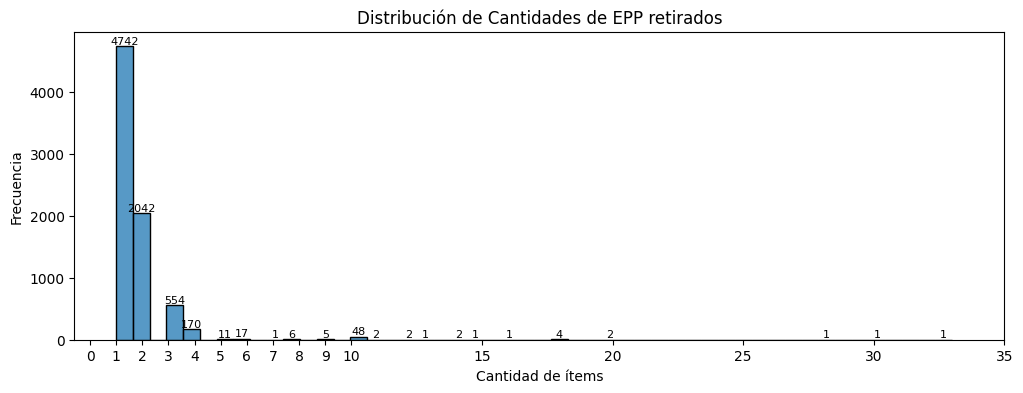

In [56]:
# Histograma
plt.figure(figsize=(12,4))
hist = sns.histplot(df_estudio1["CANTIDADPOS"], bins=50, kde=False)

# Agregar los valores encima de cada barra
for p in hist.patches:
    height = p.get_height()
    if height > 0:
        plt.text(
            p.get_x() + p.get_width()/2,
            height,
            int(height),
            ha='center',
            va='bottom',
            fontsize=8
        )

# Eje X: 0 a 10 de 1 en 1, luego de 15 en 5 en 5 hasta el máximo
max_val = int(df_estudio1["CANTIDADPOS"].max())
xticks = np.concatenate([np.arange(0, 11, 1), np.arange(15, max_val+5, 5)])
plt.xticks(xticks)

plt.title("Distribución de Cantidades de EPP retirados")
plt.xlabel("Cantidad de ítems")
plt.ylabel("Frecuencia")
plt.show()

En el grafico (Histograma) vemos que la mayos cantidad de items retirados es de cantidad 1 y 2 unidades. Para mayor claridad lo vemos tambien en una tabla de recuencias y un grafico de Torta.

    CANTIDADPOS  FRECUENCIA_ABS  FRECUENCIA_REL (%)
0          1.00            4742               62.28
1          2.00            2042               26.82
2          3.00             554                7.28
3          4.00             170                2.23
4          5.00              11                0.14
5          6.00              17                0.22
6          7.00               1                0.01
7          8.00               6                0.08
8          9.00               5                0.07
9         10.00              48                0.63
10        11.00               2                0.03
11        12.00               2                0.03
12        13.00               1                0.01
13        14.00               2                0.03
14        15.00               1                0.01
15        16.00               1                0.01
16        18.00               4                0.05
17        20.00               2                0.03
18        28

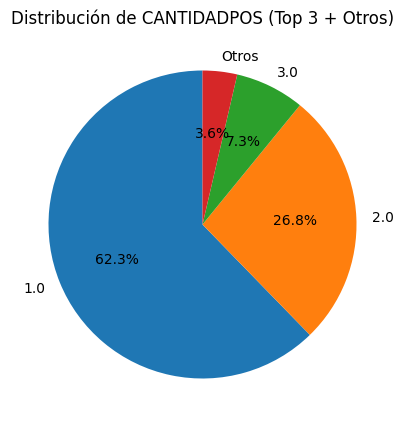

In [57]:
# --- TABLA DE FRECUENCIAS ---
tabla_frecuencias = df_estudio1["CANTIDADPOS"].value_counts().sort_index().reset_index()
tabla_frecuencias.columns = ["CANTIDADPOS", "FRECUENCIA_ABS"]

# Frecuencia relativa (%)
tabla_frecuencias["FRECUENCIA_REL (%)"] = (tabla_frecuencias["FRECUENCIA_ABS"] / len(df_estudio1)) * 100

print(tabla_frecuencias.head(20))  # 🔹 muestra las primeras 20 filas


# --- Obtener los 5 valores más frecuentes ---
top5 = tabla_frecuencias.nlargest(3, "FRECUENCIA_ABS").copy()

# Calcular la suma del resto
otros = pd.DataFrame({
    "CANTIDADPOS": ["Otros"],
    "FRECUENCIA_ABS": [tabla_frecuencias["FRECUENCIA_ABS"].sum() - top5["FRECUENCIA_ABS"].sum()]
})

# Unir top5 + otros
torta_data = pd.concat([top5[["CANTIDADPOS", "FRECUENCIA_ABS"]], otros], ignore_index=True)

# --- Gráfico de torta ---
plt.figure(figsize=(5,5))
plt.pie(
    torta_data["FRECUENCIA_ABS"],
    labels=torta_data["CANTIDADPOS"],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribución de CANTIDADPOS (Top 3 + Otros)")
plt.show()

Como vemos en estos graficos los mayores retiros de EPP son de cantidad 1 y 2, ya no tenemos valores float

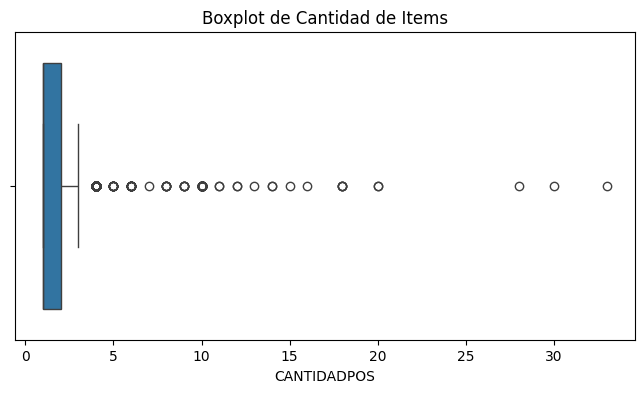

In [58]:
# Boxplots para detectar outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df_estudio1["CANTIDADPOS"])
plt.title("Boxplot de Cantidad de Items")
plt.show()


En este grafico vemos las cantidad de retiros outliers

# **Histograma con el Top 15 de cantidad de retiros.**

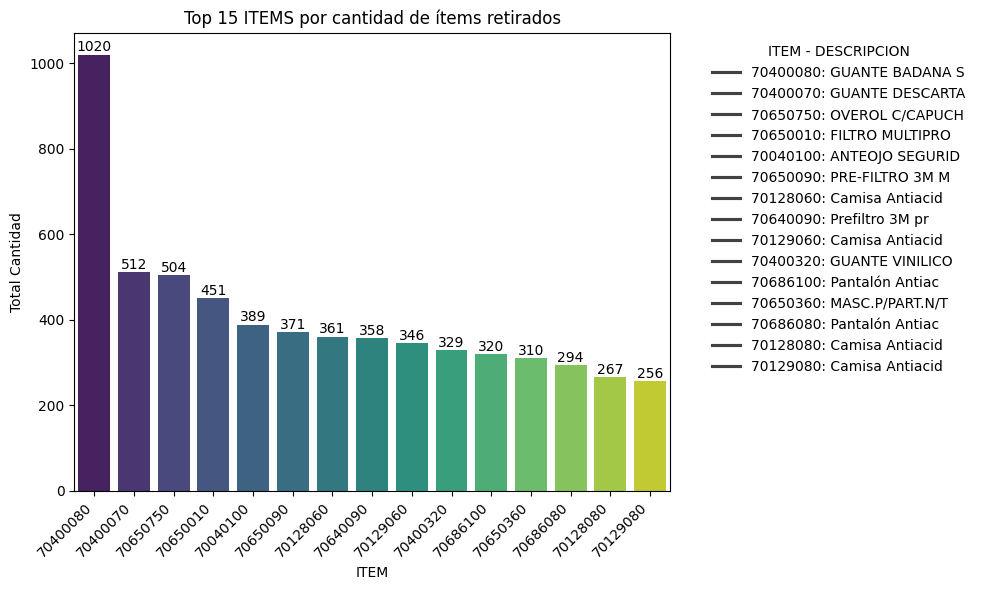

In [59]:
# --- Preparar los datos ---
# Top 15 ITEMS por cantidad de ítems retirados
top_items = df_estudio1.groupby("ITEM")["CANTIDADPOS"].sum().sort_values(ascending=False).head(15)

# Descripción recortada a 15 caracteres para ver mas calro el grafico
descripciones = df_estudio1.drop_duplicates("ITEM").set_index("ITEM")["DESCRIPCION"]
top_descriptions = descripciones[top_items.index].str[:15]

# --- Crear figura y barras ---
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=top_items.index, y=top_items.values, hue=top_items.index, dodge=False, palette="viridis", ax=ax)

# Agregar valores encima de cada barra
for i, v in enumerate(top_items.values):
    ax.text(i, v + 0.5, int(v), ha='center', va='bottom', fontsize=10)

# Configuración de títulos y ejes
ax.set_title("Top 15 ITEMS por cantidad de ítems retirados")
ax.set_xlabel("ITEM")
ax.set_ylabel("Total Cantidad")

# --- Crear una "leyenda" al costado con los códigos y descripciones ---
# Construir lista de textos para mostrar como leyenda
leyenda_texto = [f"{item}: {desc}" for item, desc in zip(top_items.index, top_descriptions.values)]

# Colocar la leyenda a la derecha
plt.legend(leyenda_texto, title="ITEM - DESCRIPCION", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

plt.xticks(rotation=45, ha='right')  # rota 45° y alinea a la derecha

plt.tight_layout()
plt.show()

Viendo el consumo muy alto del primer item, que son "Guantes.." calculamos cada cuantos dias en promedio se efectua un retiro por legajo de este item.

In [60]:
# Filtrar solo el ítem 70400080
df_item = df_estudio1[df_estudio1["ITEM"] == "70400080"].copy()

# Asegurarse de que FECHA sea datetime
df_item["TRANSACCION"] = pd.to_datetime(df_item["TRANSACCION"])

# Calcular promedio de días entre retiros por legajo
def promedio_intervalo(fecha_series):
    fechas_ordenadas = fecha_series.sort_values()
    if len(fechas_ordenadas) < 2:
        return None  # si solo hay un retiro no hay intervalo
    diffs = fechas_ordenadas.diff().dt.days.dropna()
    return diffs.mean()

promedio_dias_por_legajo = df_item.groupby("Legajo")["TRANSACCION"].apply(promedio_intervalo).reset_index()
promedio_dias_por_legajo.rename(columns={"TRANSACCION":"Promedio_dias_entre_retiros"}, inplace=True)

# Mostrar resultados
#print(promedio_dias_por_legajo.sort_values("Promedio_dias_entre_retiros"))
# --- Filtrar solo valores válidos (no nulos y mayores a 0) ---
promedio_valido = promedio_dias_por_legajo[
    promedio_dias_por_legajo["Promedio_dias_entre_retiros"] > 0
]

# --- Top 20 legajos con menor promedio de días ---
top20_legajos = promedio_valido.sort_values("Promedio_dias_entre_retiros").head(20)
# --- Agregar CENTROCOSTO y DESCRIPCC ---
# Tomamos el primer valor de cada legajo
info_legajo = df_item.groupby("Legajo")[["CENTROCOSTO", "DESCRIPCC"]].first().reset_index()
# Recortar DESCRIPCC a 20 caracteres
info_legajo["DESCRIPCC"] = info_legajo["DESCRIPCC"].str[:20]
# Hacer merge con el top20
top20_legajos_info = top20_legajos.merge(info_legajo, on="Legajo", how="left")

# Reordenar columnas
top20_legajos_info = top20_legajos_info[[
    "Legajo", "CENTROCOSTO", "DESCRIPCC", "Promedio_dias_entre_retiros"
]]

# Mostrar resultado
print(top20_legajos_info)


    Legajo  CENTROCOSTO             DESCRIPCC  Promedio_dias_entre_retiros
0  1067.00     42150.00  INSPECCION DE EQUIPO                         4.50
1   321.00     41220.00  HIDROCARBUROS-PL.TDI                         6.00
2  1357.00     42133.00  PLANIFICACION DEL MA                         9.95
3  1350.00     42130.00      TALLER ESTATICOS                        15.62
4  1305.00     42131.00      TALLER ROTATIVOS                        15.76
5  1157.00     42130.00      TALLER ESTATICOS                        16.04
6  1349.00     42130.00      TALLER ESTATICOS                        16.78
7   934.00     42131.00      TALLER ROTATIVOS                        17.83
8   944.00     42133.00  PLANIFICACION DEL MA                        20.00
9   700.00     41310.00   QUIMICOS-PLANTA PAC                        21.44
10  756.00     42133.00  PLANIFICACION DEL MA                        22.00
11  942.00     42130.00      TALLER ESTATICOS                        22.56
12 1348.00     42133.00  

In [61]:
top20_legajos_info.describe()

,Legajo,CENTROCOSTO,Promedio_dias_entre_retiros
count,20.00,20.00,20.00
mean,1068.85,42449.05,19.24
std,277.20,1843.77,6.43
min,321.00,41220.00,4.50
25%,940.00,42130.00,15.97
50%,1084.50,42131.00,21.72
75%,1348.25,42133.00,23.80
max,1370.00,50200.00,26.93


Con esta tabla de frecuencias, observamos que los retiros mas frecuentes tienen un promedio de que cada 4.5 dias se efectua un retiro. La media de los promedios es de 20 dias.

# Histrograma con el Top 15 de items en importe

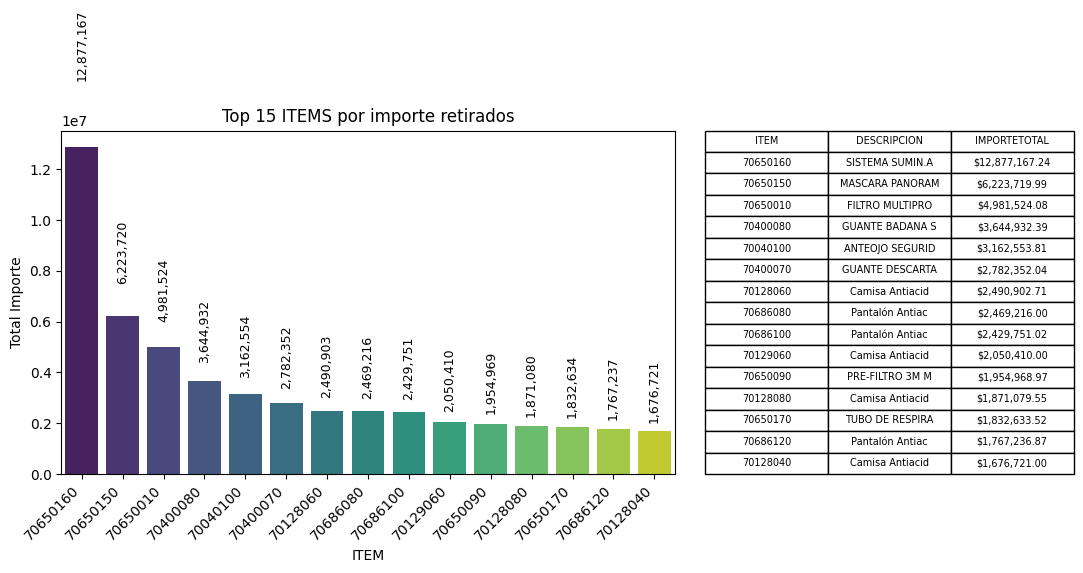

In [62]:
# --- Preparar los datos ---
# Top 15 ITEMS por importe retirados
top_items = df_estudio1.groupby("ITEM")["IMPORTETOTAL"].sum().sort_values(ascending=False).head(15)

# Descripción recortada a 15 caracteres
descripciones = df_estudio1.drop_duplicates("ITEM").set_index("ITEM")["DESCRIPCION"]
top_descriptions = descripciones[top_items.index].str[:15]

# --- Crear figura y barras ---
fig, ax = plt.subplots(figsize=(14,6))  # ancho aumentado
sns.barplot(x=top_items.index, y=top_items.values, hue=top_items.index, dodge=False, palette="viridis", ax=ax)

# Agregar valores encima de cada barra
for i, v in enumerate(top_items.values):
    ax.text(
        i,            # posición horizontal (centro de la barra)
        v +( v * 0.2),      # posición vertical, un poco arriba de la barra
        f"{v:,.0f}",
        #int(v),       # texto a mostrar
        ha='center',  # alinear horizontalmente al centro de la barra
        va='bottom',  # alinear verticalmente al fondo del texto
        fontsize=9,
        rotation=90   # gira el texto 90 grados (vertical)
    )

# Configuración de títulos y ejes
ax.set_title("Top 15 ITEMS por importe retirados")
ax.set_xlabel("ITEM")
ax.set_ylabel("Total Importe")

# --- Crear una "leyenda" al costado con los códigos y descripciones ---
tabla = pd.DataFrame({
    "ITEM": top_items.index,
    "DESCRIPCION": top_descriptions.values,
    "IMPORTETOTAL": [f"${v:,.2f}" for v in top_items.values]
})

# Ajustar bbox para agrandar la tabla
plt.table(
    cellText=tabla.values,
    colLabels=tabla.columns,
    cellLoc='center',
    colLoc='center',
    loc='right',
    bbox=[1.05, 0, 0.6, 1]  # ancho aumentado de 0.5 → 0.6
)
plt.xticks(rotation=45, ha='right')  # rota 45° y alinea a la derecha

plt.tight_layout()
plt.show()

En el Histograma observamos en forma descendiente los items retirados con valores en pesos.

# Grafico de Pareto de costos de EPP
## tomamos los 30 items mas costosos para visualizar mejor el grafico

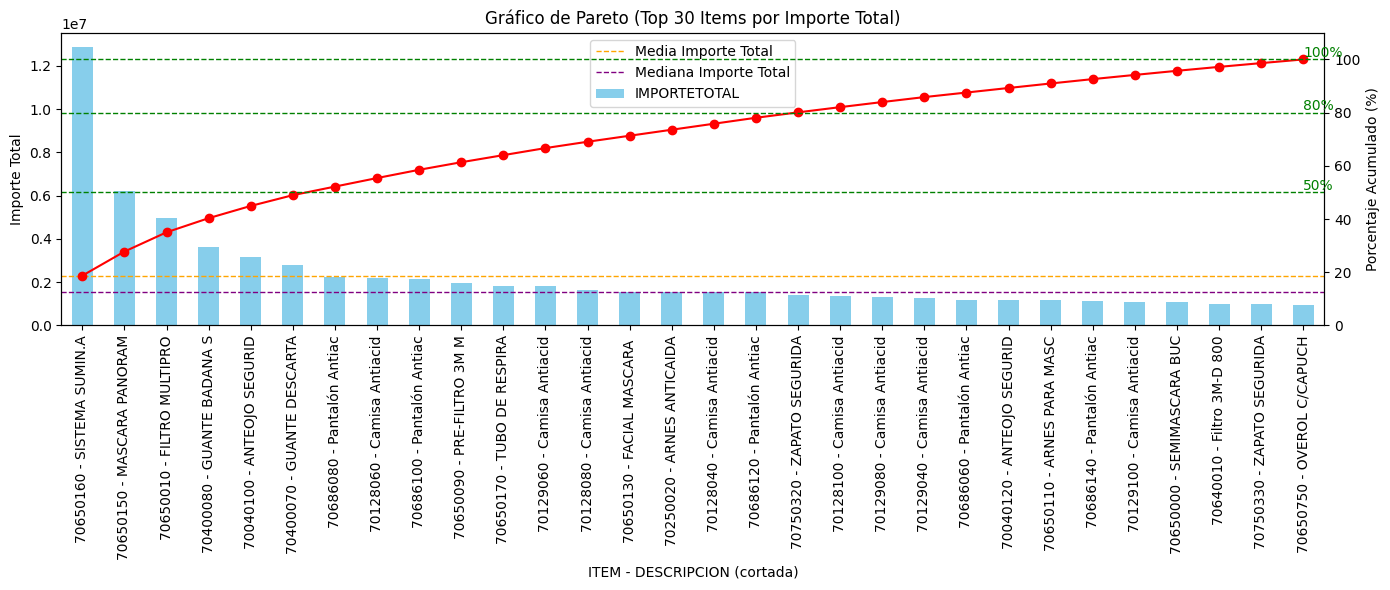

In [63]:
# Agrupar por ITEM y DESCRIPCION, sumar IMPORTETOTAL
pareto = (
    df_estudio1.groupby(["ITEM", "DESCRIPCION"])["IMPORTETOTAL"]
    .sum()
    .sort_values(ascending=False)
    .head(30)  # 🔹 Solo los 30 más altos
    .reset_index()
)

# Crear etiqueta corta para eje X (ITEM + DESCRIPCION recortada)
pareto["ETIQUETA"] = pareto["ITEM"].astype(str) + " - " + pareto["DESCRIPCION"].str.slice(0, 15)

# Usar la etiqueta como índice
pareto = pareto.set_index("ETIQUETA")

# Calcular porcentaje acumulado
cum_percentage = pareto["IMPORTETOTAL"].cumsum() / pareto["IMPORTETOTAL"].sum() * 100

# Crear gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(14,6))

# Barras (IMPORTETOTAL)
pareto["IMPORTETOTAL"].plot(kind="bar", color="skyblue", ax=ax1)
ax1.set_ylabel("Importe Total")
ax1.set_xlabel("ITEM - DESCRIPCION (cortada)")
ax1.tick_params(axis="x", rotation=90)

# Líneas de referencia en el eje de importes
ax1.axhline(pareto["IMPORTETOTAL"].mean(), color="orange", linestyle="--", linewidth=1, label="Media Importe Total")
ax1.axhline(pareto["IMPORTETOTAL"].median(), color="purple", linestyle="--", linewidth=1, label="Mediana Importe Total")

# Eje secundario (porcentaje acumulado)
ax2 = ax1.twinx()
cum_percentage.plot(color="red", marker="o", ax=ax2)
ax2.set_ylabel("Porcentaje Acumulado (%)")
ax2.set_ylim(0, 110)

# Líneas de referencia en porcentaje acumulado
for ref in [50, 80, 100]:
    ax2.axhline(ref, color="green", linestyle="--", linewidth=1)
    ax2.text(len(pareto)-1, ref+1, f"{ref}%", color="green")

# Leyendas y título
ax1.legend(loc="upper center")
plt.title("Gráfico de Pareto (Top 30 Items por Importe Total)")
plt.tight_layout()
plt.show()

Barras azules = importe total de cada ITEM.

Línea roja = % acumulado.

Líneas punteadas verdes = 50%, 80% y 100% del acumulado.

Línea punteada naranja = media de importes.

Línea punteada violeta = mediana de importes.

El analisis es el siguiente:
1. con los 7 primeros items tenemos el 50% del gasto total, y el 80% en el lugar 20 de los importes mas altos.
 *Aclaracion: si tomamos otra cantidad de items a analizar estas cantidades tienen una pequeña variacion*

# Histograma de Importes retirados por Centro de costos

/tmp/ipython-input-3011641107.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


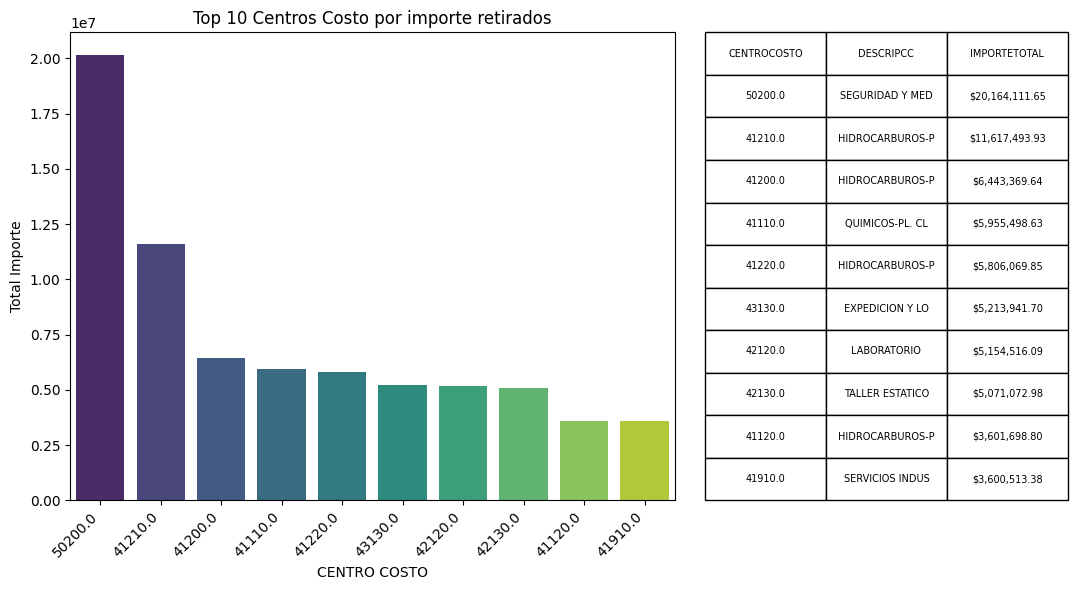

In [64]:
# --- Preparar los datos ---
# Top 10 CENTRO DE COSTOS por importe retirados
top_items = (
    df_estudio1.groupby("CENTROCOSTO")["IMPORTETOTAL"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Descripción recortada a 15 caracteres
descripciones = (
    df_estudio1.drop_duplicates("CENTROCOSTO")
    .set_index("CENTROCOSTO")["DESCRIPCC"]
)
top_descriptions = descripciones[top_items.index].str[:15]

# --- Crear figura y barras ---
fig, ax = plt.subplots(figsize=(14,6))

sns.barplot(
    x=top_items.index,
    y=top_items.values,
    order=top_items.index,   # asegura el orden descendente
    palette="viridis",
    ax=ax
)

# Configuración de títulos y ejes
ax.set_title("Top 10 Centros Costo por importe retirados")
ax.set_xlabel("CENTRO COSTO")
ax.set_ylabel("Total Importe")

# --- Crear una "tabla" al costado con los códigos y descripciones ---
tabla = pd.DataFrame({
    "CENTROCOSTO": top_items.index,
    "DESCRIPCC": top_descriptions.values,
    "IMPORTETOTAL": [f"${v:,.2f}" for v in top_items.values]
})

plt.table(
    cellText=tabla.values,
    colLabels=tabla.columns,
    cellLoc='center',
    colLoc='center',
    loc='right',
    bbox=[1.05, 0, 0.6, 1]
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vemos el histograma por importe en forma descendiente

Observamos que el Centro de costo 50200 que es Seguridad y Medio Ambiente, tiene el mayor costo y vamos a investigar que items son:

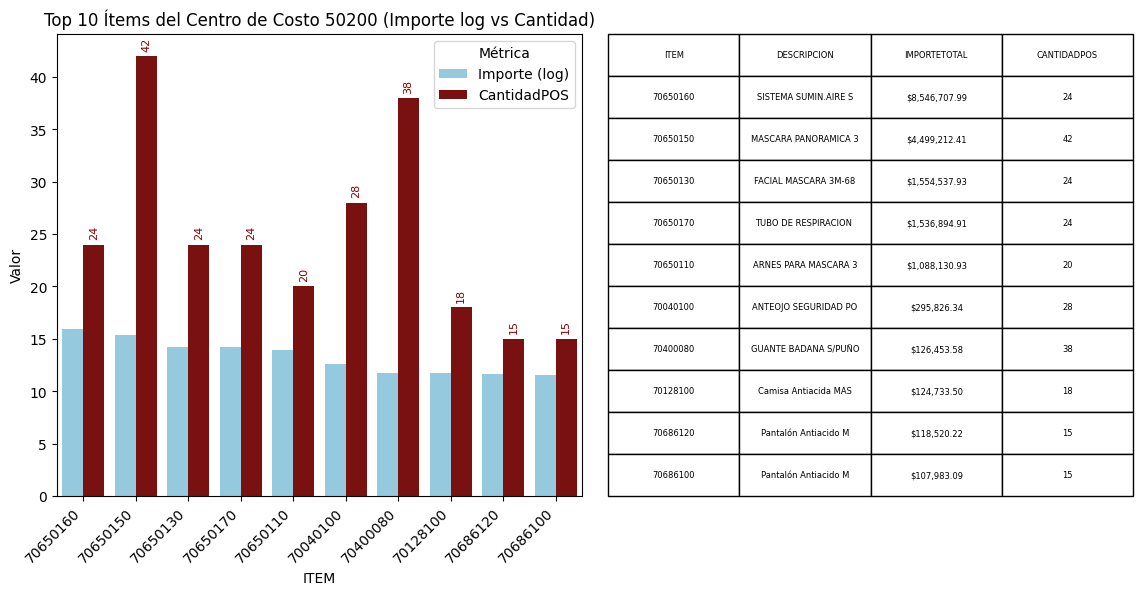

In [65]:
# --- Filtrar por centro de costo 50200 ---
df_filtrado = df_estudio1[df_estudio1["CENTROCOSTO"] == 50200]

# --- Top 10 items por importe ---
top_items = (
    df_filtrado.groupby("ITEM")["IMPORTETOTAL"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# --- Resumen con importe y cantidad ---
resumen = (
    df_filtrado.groupby("ITEM")[["IMPORTETOTAL", "CANTIDADPOS"]]
    .sum()
    .loc[top_items]
)

# Aplicar logaritmo al importe
resumen["LOG_IMPORTETOTAL"] = np.log1p(resumen["IMPORTETOTAL"])

# Descripciones de los items
descripciones = (
    df_filtrado.drop_duplicates("ITEM")
    .set_index("ITEM")["DESCRIPCION"]
)
top_descriptions = descripciones[top_items].str[:20]

# --- Pasar a formato largo para seaborn ---
resumen_melt = resumen.reset_index().melt(
    id_vars="ITEM",
    value_vars=["LOG_IMPORTETOTAL", "CANTIDADPOS"],
    var_name="Métrica",
    value_name="Valor"
)

# Renombrar métricas
resumen_melt["Métrica"] = resumen_melt["Métrica"].replace({
    "LOG_IMPORTETOTAL": "Importe (log)",
    "CANTIDADPOS": "CantidadPOS"
})

# --- Crear figura ---
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(
    x="ITEM",
    y="Valor",
    hue="Métrica",
    data=resumen_melt,
    palette=["skyblue", "darkred"],
    ax=ax
)

# Configuración
ax.set_title("Top 10 Ítems del Centro de Costo 50200 (Importe log vs Cantidad)")
ax.set_xlabel("ITEM")
ax.set_ylabel("Valor")
plt.xticks(rotation=45, ha='right')

# --- Etiquetas SOLO para CantidadPOS ---
# Seleccionamos las barras del segundo grupo (CantidadPOS)
bars = [p for p, (val, met) in zip(ax.patches, resumen_melt[["Valor","Métrica"]].values) if met == "CantidadPOS"]

for bar, val in zip(bars, resumen_melt[resumen_melt["Métrica"]=="CantidadPOS"]["Valor"]):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.5,             # separa un poco el número de la barra
        f'{int(val)}',          # solo enteros
        ha="center", va="bottom",
        rotation=90,
        fontsize=8,
        color="darkred"
    )

# --- Crear tabla al costado ---
tabla = pd.DataFrame({
    "ITEM": resumen.index,
    "DESCRIPCION": top_descriptions.values,
    "IMPORTETOTAL": [f"${v:,.2f}" for v in resumen["IMPORTETOTAL"]],
    "CANTIDADPOS": resumen["CANTIDADPOS"].astype(int)
})

plt.table(
    cellText=tabla.values,
    colLabels=tabla.columns,
    cellLoc='center',
    colLoc='center',
    loc='right',
    bbox=[1.05, 0, 1.0, 1]
)

plt.subplots_adjust(right=0.65)
plt.show()

Como vemos en este ultimo grafico de doble barra (Importe y Cantidad) por item, se trata de el item mas costoso y que ya nos habia salido como un valor outliers, solo utilizaron 24 unidades pero representa el costo mas elevado. (Se aplica logaritmo al importe para poder ver en escala las dos barras, los montos reales estan en el cuadro de referencia)

# Histograma de Cantidades retirados por Centro de costos

/tmp/ipython-input-854784125.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


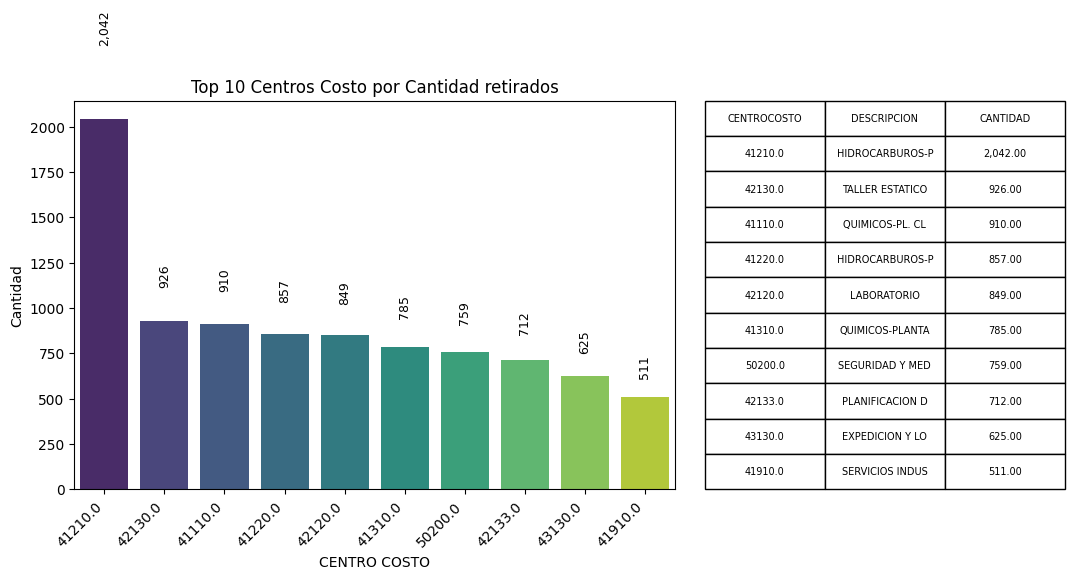

In [66]:
# --- Preparar los datos ---
# Top 10 CENTRO DE COSTOS por CANTIDAD retirados
top_items = (
    df_estudio1.groupby("CENTROCOSTO")["CANTIDADPOS"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Descripción recortada a 15 caracteres
descripciones = (
    df_estudio1.drop_duplicates("CENTROCOSTO")
    .set_index("CENTROCOSTO")["DESCRIPCC"]
)
top_descriptions = descripciones[top_items.index].str[:15]

# --- Crear figura y barras ---
fig, ax = plt.subplots(figsize=(14,6))

sns.barplot(
    x=top_items.index,
    y=top_items.values,
    order=top_items.index,   # asegura el orden descendente
    palette="viridis",
    ax=ax
)
# Agregar valores encima de cada barra
for i, v in enumerate(top_items.values):
    ax.text(
        i,            # posición horizontal (centro de la barra)
        v +( v * 0.2),      # posición vertical, un poco arriba de la barra
        f"{v:,.0f}",
        #int(v),       # texto a mostrar
        ha='center',  # alinear horizontalmente al centro de la barra
        va='bottom',  # alinear verticalmente al fondo del texto
        fontsize=9,
        rotation=90   # gira el texto 90 grados (vertical)
    )


# Configuración de títulos y ejes
ax.set_title("Top 10 Centros Costo por Cantidad retirados")
ax.set_xlabel("CENTRO COSTO")
ax.set_ylabel("Cantidad")

# --- Crear una "tabla" al costado con los códigos y descripciones ---
tabla = pd.DataFrame({
    "CENTROCOSTO": top_items.index,
    "DESCRIPCION": top_descriptions.values,
    "CANTIDAD": [f"{v:,.2f}" for v in top_items.values]
})

plt.table(
    cellText=tabla.values,
    colLabels=tabla.columns,
    cellLoc='center',
    colLoc='center',
    loc='right',
    bbox=[1.05, 0, 0.6, 1]
)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observamos que el Centro de costo 41210 HIDROCARBURO es el de mayor consumo en cantidad de EPP por encima del resto de los centros.

De este analisis nos surge ver la cantidad de operarios (legajos) por centro de costos.

In [67]:
top_items = (
    df_estudio1.groupby(["CENTROCOSTO", "DESCRIPCC"])["Legajo"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)
#.head(10)
top_items

,CENTROCOSTO,DESCRIPCC,Legajo
0,41110.00,QUIMICOS-PL. CL SODA,42
1,41210.00,HIDROCARBUROS-PL.MTD,34
2,41220.00,HIDROCARBUROS-PL.TDI,33
3,42133.00,PLANIFICACION DEL MANTENIMIENTO,33
4,41120.00,HIDROCARBUROS-PL. GASES,32
5,42120.00,LABORATORIO,31
6,41910.00,SERVICIOS INDUSTRIALES,28
7,42130.00,TALLER ESTATICOS,24
8,43130.00,EXPEDICION Y LOGISTICA,22
9,41310.00,QUIMICOS-PLANTA PAC,19


In [68]:
top_items.describe()

,CENTROCOSTO,Legajo
count,33.00,33.00
mean,40676.52,13.76
std,7852.28,12.23
min,10400.00,1.00
25%,41210.00,4.00
50%,42130.00,10.00
75%,43100.00,22.00
max,50250.00,42.00


In [69]:
total_legajos = df_estudio1["Legajo"].nunique()
print(total_legajos)

368


Vemos la cantidad de legajos por Centro de costos y el promedio es 14 legajos. Y el total de legajos es 368.

# Histograma de Cantidades retiradas por Legajos y Centro de Costos

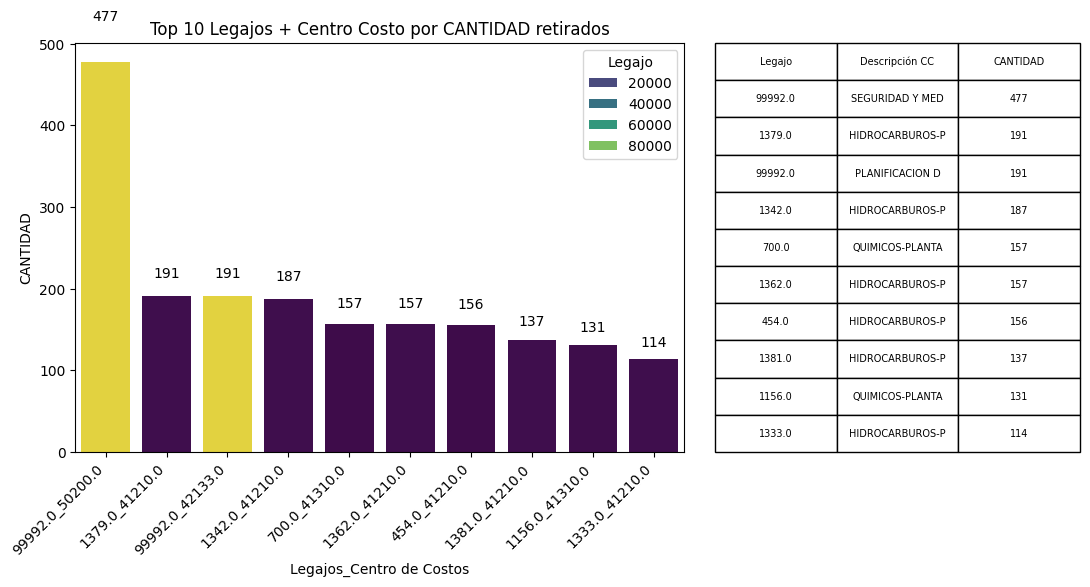

In [70]:
# --- Preparar los datos ---
# Top 10 LAGAJOS por CANTIDADES retirados
top_items = df_estudio1.groupby(["Legajo", "CENTROCOSTO"])["CANTIDADPOS"].sum().sort_values(ascending=False).head(10)

# Descripción recortada a 10 caracteres
descripciones_cc = df_estudio1.drop_duplicates("CENTROCOSTO").set_index("CENTROCOSTO")["DESCRIPCC"].str[:15]

# --- Crear figura y barras ---
fig, ax = plt.subplots(figsize=(14,6))  # ancho aumentado
sns.barplot(x=[f"{leg}_{cc}" for leg, cc in top_items.index], y=top_items.values, hue=top_items.index.get_level_values(0), dodge=False, palette="viridis", ax=ax)

# Configuración de títulos y ejes
ax.set_title("Top 10 Legajos + Centro Costo por CANTIDAD retirados")
ax.set_xlabel("Legajos_Centro de Costos")
ax.set_ylabel("CANTIDAD")

# --- Crear una "leyenda" al costado con los códigos y descripciones ---
tabla_data = []
for (legajo, centro_costo), cantidad in top_items.items():
    descripcion_cc = descripciones_cc.get(centro_costo, "N/A")
    tabla_data.append([legajo, descripcion_cc, f"{cantidad:,.0f}"])

tabla = pd.DataFrame(tabla_data, columns=["Legajo", "Descripción CC", "CANTIDAD"])

# Agregar valores encima de cada barra
for i, v in enumerate(top_items.values):
    ax.text(
        i,            # posición horizontal (centro de la barra)
        v + (v * 0.1),      # posición vertical, un poco arriba de la barra
        int(v),       # texto a mostrar
        ha='center',  # alinear horizontalmente al centro de la barra
        va='bottom',  # alinear verticalmente al fondo del texto
        fontsize=10,
        #rotation=90   # gira el texto 90 grados (vertical)
    )

# Ajustar bbox para agrandar la tabla
plt.table(
    cellText=tabla.values,
    colLabels=tabla.columns,
    cellLoc='center',
    colLoc='center',
    loc='right',
    bbox=[1.05, 0, 0.6, 1]  # ancho aumentado de 0.5 → 0.6
)
plt.xticks(rotation=45, ha='right')  # rota 45° y alinea a la derecha

plt.tight_layout()
plt.show()

En este analisis personalizado por legajo, se advierte que el legajo 99992 es generico, es para uso de todo el Departamento, no de un legajo de un operario en particular. Dejando fuera de analisis ese legajo generico, observamos que los legajos siguientes tienen un consumo parecido (aprox. 190 unidades) y pertenecen al centro de costos 41210 que es el de mayor consumo, lo que se sugiere analizar detenidamente a esos legajos ya que de el total del departamente 2 solamente tienen un consumo excesivo.
Haciendo foco en el legajo generico 99992 es un alerta para que sea revisada ese tipo de retiros por parte de la empresa.

# Grafico de Pareto de Importes por Centro de Costo

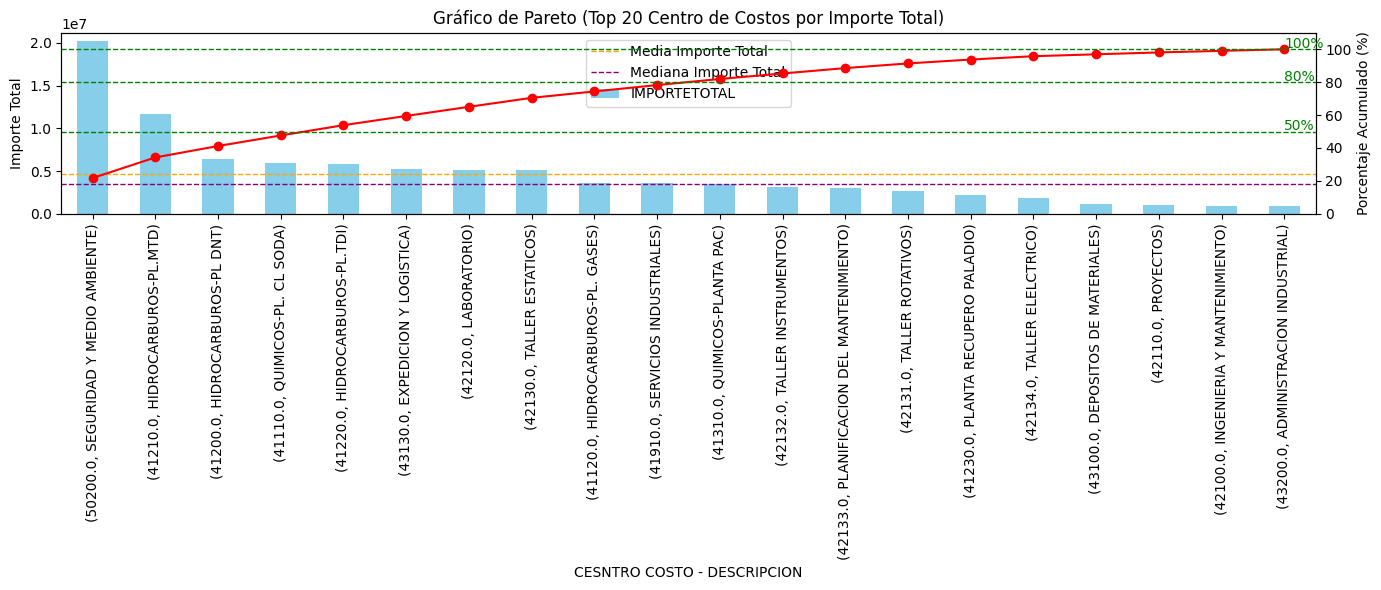

In [71]:
# Agrupar por CENTRO COSTO y IMPORTE
pareto = (
    df_estudio1.groupby(["CENTROCOSTO", "DESCRIPCC"])["IMPORTETOTAL"]
    .sum()
    .sort_values(ascending=False)
    .head(20)  # 🔹 Solo los 20 más altos
)

# Calcular porcentaje acumulado
cum_percentage = pareto.cumsum() / pareto.sum() * 100

# Crear gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(14,6))

# Barras (IMPORTETOTAL)
pareto.plot(kind="bar", color="skyblue", ax=ax1)
ax1.set_ylabel("Importe Total")
ax1.set_xlabel("CESNTRO COSTO - DESCRIPCION")
ax1.tick_params(axis="x", rotation=90)

# Líneas de referencia en el eje de importes
ax1.axhline(pareto.mean(), color="orange", linestyle="--", linewidth=1, label="Media Importe Total")
ax1.axhline(pareto.median(), color="purple", linestyle="--", linewidth=1, label="Mediana Importe Total")

# Eje secundario (porcentaje acumulado)
ax2 = ax1.twinx()
cum_percentage.plot(color="red", marker="o", ax=ax2)
ax2.set_ylabel("Porcentaje Acumulado (%)")
ax2.set_ylim(0, 110)

# Líneas de referencia en porcentaje acumulado
for ref in [50, 80, 100]:
    ax2.axhline(ref, color="green", linestyle="--", linewidth=1)
    ax2.text(len(pareto)-1, ref+1, f"{ref}%", color="green")

# Leyendas y título
ax1.legend(loc="upper center")
plt.title("Gráfico de Pareto (Top 20 Centro de Costos por Importe Total)")
plt.tight_layout()
plt.show()

Con el grafico de Pareto podemos ver que revisando los primeros centros de costos del grafico tenemos el 50% del consumo.

# **Hallazgos y definicion de los problemas encontrados**
A partir del análisis exploratorio y estadístico de los datos y de la visualización de los graficos realizados, se presentan los siguientes hallazgos:
## 1. Registros analizados
Se procesaron 7.619 registros correspondientes a consumos de elementos de protección personal (EPP) durante el período analizado que va desde el 06/07/2023 al 31/07/2024.

## 2. Centros de Costo
Participaron 33 Centros de Costo que registraron consumos de EPP.

## 3. Personal involucrado
Se identificaron 368 legajos únicos, lo que representa la cantidad de personas que realizaron retiros de elementos.

## 4. Variedad de elementos
Se registraron 191 tipos distintos de EPP utilizados en los diferentes centros de costo.

## 5. Cantidad y frecuencia de retiros

El 62% de los retiros corresponde a una unidad,

El 27% corresponde a dos unidades.
Esto muestra que la mayoría de los consumos se realizan en cantidades reducidas, lo que refleja un uso controlado por parte del personal.

## 6. Ítem de alto costo
Se detectó un ítem con valor unitario elevado: “Equipo de suministro de aire”, utilizado exclusivamente en el Centro de Costo Seguridad y Medio Ambiente. Este producto explica parte importante del costo total de dicho centro.

## 7. Ítem más utilizado
El ítem con mayor frecuencia de consumo es el 70400080 – “Guantes de badana”.
El análisis de su frecuencia de retiro mostró un promedio de 4,5 días entre entregas en el caso con mas frecuencia, la media es de 20 dias, estos datos son de los top 20 con mayor frecuencia de retiros.
Los legajos que registran este consumo pertenecen principalmente a los centros de costo Taller y Planificación de Mantenimiento, por lo cual se sugiere evaluar la frecuencia y control de uso.

## 8. Análisis de Pareto (Ítems por Importe)
El gráfico de Pareto evidencia que pocos ítems concentran el 80% del gasto total, por lo que estos deben ser priorizados para revisar criterios de uso y reposición.

## 9. Consumo por Centro de Costo
El centro Seguridad y Medio Ambiente presenta el mayor costo total, explicado por el tipo de equipos utilizados (de alto valor unitario).
Por otro lado, el centro Hidrocarburos (41210) registra el mayor número de EPP consumidos, aunque su cantidad de personal está cercana al promedio general, lo que sugiere revisar las necesidades operativas de ese sector.

##10. Análisis interno del Centro de Seguridad y Medio Ambiente
El histograma comparativo muestra que el costo total elevado se debe principalmente a las características y precios de los ítems, y no a la cantidad consumida.

##11. Consumo por legajo
Los legajos pertenecientes al centro Hidrocarburos presentan los mayores consumos individuales, coherente con las tareas del área, aunque se detectaron algunos casos con valores superiores a la media.
Se recomienda revisar puntualmente esos legajos para verificar la justificación de los consumos.

##12. Legajo genérico 99992
Se observó un uso importante del legajo genérico 99992, asociado directamente al centro de costo y no a una persona específica.
Se sugiere revisar y controlar su utilización, dado que puede enmascarar consumos no imputados a operarios determinados.

# **MODELADO**

# Objetivo del modelado

Vamos a confeccionar una matriz de correlación antes del modelado, porque:

Me permite comprender qué variables influyen más en el consumo.

Ayuda a detectar relaciones redundantes.

Da criterio para ajustar tu modelo y eliminar variables poco relevantes.

Es una tabla que muestra la relación (correlación lineal) entre todas las variables numéricas de los datos.
Cada valor varía entre -1 y 1:

Valor	Interpretación
+1	Correlación positiva perfecta (si una sube, la otra también)
0	Sin relación lineal aparente
-1	Correlación negativa perfecta (si una sube, la otra baja)

CANTIDADPOS     1.00
Legajo          0.37
IMPORTETOTAL    0.19
CENTROCOSTO     0.12
AÑO             0.08
Precio Std      0.05
MES            -0.05
Name: CANTIDADPOS, dtype: float64


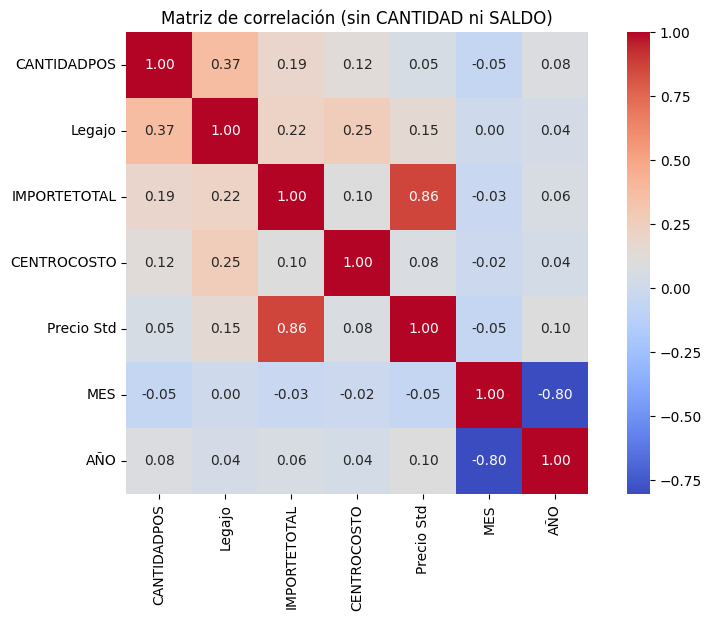

In [72]:
# Extraemos mes y año
df_estudio1["MES"] = df_estudio1["TRANSACCION"].dt.month
df_estudio1["AÑO"] = df_estudio1["TRANSACCION"].dt.year
# Seleccionamos solo las columnas relevantes
cols = ["CANTIDADPOS", "Legajo", "IMPORTETOTAL", "CENTROCOSTO", "Precio Std", "MES", "AÑO"]

corr = df_estudio1[cols].corr()

# Ver correlaciones con la variable objetivo
corr_target = corr["CANTIDADPOS"].sort_values(ascending=False)
print(corr_target)

# --- Visualizar con mapa de calor ---
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación (sin CANTIDAD ni SALDO)")
plt.show()

Veamos la interpretación detallada, porque esto te sirve directamente para decidir qué variables incluir y cómo modelar los desvíos futuros 👇

# Matriz de correlación — interpretación
## Variable	Correlación con CANTIDADPOS	Interpretación
Legajo (0.37)	Moderada. Los consumos dependen bastante de la persona (legajo). Hay perfiles de operarios con patrones de uso distintos. Esto es una variable clave para modelar.

IMPORTETOTAL (0.19)	Baja-moderada. Lógico: más cantidad → más importe, pero también influye el precio.

CENTROCOSTO (0.12)	Débil, pero indica que el tipo de tarea o sector afecta el nivel de consumo.

AÑO (0.08)	Tendencia leve en el tiempo: podría haber un aumento general de consumos. Conviene mantenerlo en el modelo.

Precio Std (0.05)	Casi sin relación: el precio unitario no explica cuánta cantidad se retira.

MES (-0.05)	Correlación negativa muy débil: no hay un patrón fuerte de estacionalidad mensual.

# Modelo a utilizar: Aprendisaje Supervisado - Regresion Ridge.

El objetivo ahora es detectar desvíos en consumos futuros, los pasos a seguir:

Entrenar un modelo base (Ridge) con los datos históricos.

Calcular el error (residual) entre lo predicho y lo real:

residuo =  (y real) −  (y predicho )

Definir un umbral de alerta, consideraremos 2 veces la desviación estándar del error.
Si un nuevo consumo supera ese umbral → se considera “fuera de lo normal”.

Dividimos los datos en 80% entrenamiento y 20% test.

🔹 Ridge -> RMSE: 1.07, R²: 0.28, Alpha óptimo: 100
🔹 Umbral de desvío: 2.31


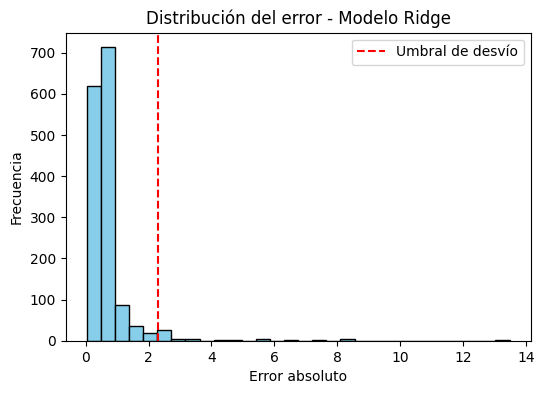

In [73]:
# ============================================
# 🔹 DETECCIÓN DE DESVÍOS DE CONSUMO CON RIDGE
# ============================================

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 1. Cargar datos históricos ---
#df = pd.read_csv("consumo_historico.csv", parse_dates=["TRANSACCION"])
df=df_estudio1

# --- 2. Crear variables temporales ---
df["AÑO"] = df["TRANSACCION"].dt.year
df["MES"] = df["TRANSACCION"].dt.month

# --- 3. Seleccionar variables numéricas relevantes ---
cols_modelo = ["Legajo", "CENTROCOSTO", "Precio Std", "IMPORTETOTAL", "AÑO", "MES"]
X = df[cols_modelo]
y = df["CANTIDADPOS"]

# --- 4. Dividir entrenamiento / prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Escalado ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6. Entrenamiento Ridge con búsqueda de alpha ---
ridge = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
best_ridge = grid.best_estimator_

# --- 7. Evaluación ---
y_pred = best_ridge.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"🔹 Ridge -> RMSE: {rmse:.2f}, R²: {r2:.2f}, Alpha óptimo: {grid.best_params_['alpha']}")

# --- 8. Calcular errores y umbral ---
errores = abs(y_test - y_pred)
umbral = errores.mean() + 2 * errores.std()
print(f"🔹 Umbral de desvío: {umbral:.2f}")

# --- 9. Visualización rápida ---
plt.figure(figsize=(6,4))
plt.hist(errores, bins=30, color='skyblue', edgecolor='k')
plt.axvline(umbral, color='red', linestyle='--', label='Umbral de desvío')
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución del error - Modelo Ridge")
plt.legend()
plt.show()

# --- 10. Función para detectar desvíos en nuevos datos ---
def detectar_desvios(df_nuevo):
    df_nuevo["AÑO"] = df_nuevo["TRANSACCION"].dt.year
    df_nuevo["MES"] = df_nuevo["TRANSACCION"].dt.month

    X_new = df_nuevo[cols_modelo]
    X_new_scaled = scaler.transform(X_new)

    y_pred_new = best_ridge.predict(X_new_scaled)
    error = abs(df_nuevo["CANTIDADPOS"] - y_pred_new)

    df_nuevo["CANTIDAD_PRED"] = y_pred_new
    df_nuevo["ERROR"] = error
    df_nuevo["DESVIO"] = np.where(error > umbral, "⚠️ Desvío", "Normal")

    return df_nuevo[["ITEM", "Legajo", "CENTROCOSTO", "CANTIDADPOS", "CANTIDAD_PRED", "ERROR", "DESVIO"]]



Interpretación técnica:
1. Precisión general :

Un RMSE de 1.07 es razonable porque los consumos (CANTIDADPOS) suelen ser bajos (por ejemplo, 1–5 unidades promedio).
Significa que la predicción está normalmente a ±1 unidad de la cantidad real.

2. Capacidad explicativa:

El R² = 0.28 indica que el modelo explica una parte del comportamiento (28%), pero hay un 72% que depende de factores no incluidos (por ejemplo, tipo de tarea, clima, condiciones de trabajo, etc.).

Esto es normal en datos de consumo humano, donde hay muchos factores cualitativos.

3. Regularización (α = 100)

El modelo Ridge penaliza los coeficientes grandes (para evitar que se ajusten demasiado a ruidos o valores extremos).
El hecho de que el mejor valor sea 100 indica que:
Sin penalización fuerte, el modelo se sobreajustaba; con α=100 logra un equilibrio más estable y generalizable.

4. Umbral de desvío

El umbral de 2.31 funciona como una “alarma” estadística:

Si el error > 2.31 → consumo fuera del patrón esperado → “Desvío detectado”.

Si el error ≤ 2.31 → “Normal”.

Esto te permite crear un sistema de control automático, donde cada nuevo consumo mensual puede compararse con su predicción.


El siguiente gráfico permite mostrar los consumos “normales” y los "desvíos" detectados por el modelo Ridge.

**Objetivo del gráfico**

Mostrar para cada registro del set de prueba:

El valor real de CANTIDADPOS.

El valor predicho (CANTIDAD_PRED).

Colorear en rojo los puntos donde el error supera el umbral de 2.31 (los “desvíos”).

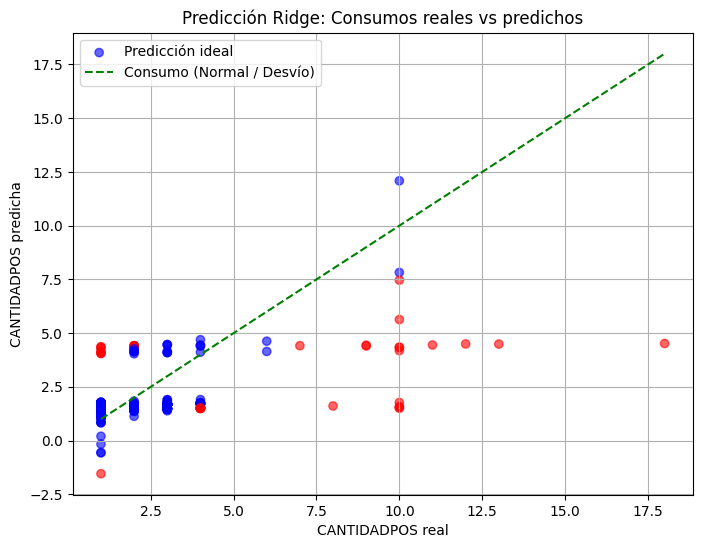

📊 Resumen:
Desvío
Normal       1481
⚠️ Desvío      42
Name: count, dtype: int64

Porcentaje de desvíos detectados: 2.76%


In [74]:
# --- Calcular error absoluto y etiquetas de desvío ---
resultados = pd.DataFrame({
    "Real": y_test,
    "Predicho": y_pred,
})
resultados["Error"] = abs(resultados["Real"] - resultados["Predicho"])
resultados["Desvío"] = np.where(resultados["Error"] > umbral, "⚠️ Desvío", "Normal")

# --- Gráfico de dispersión (Real vs Predicho) ---
plt.figure(figsize=(8, 6))
plt.scatter(resultados["Real"], resultados["Predicho"],
            c=np.where(resultados["Desvío"] == "⚠️ Desvío", "red", "blue"),
            alpha=0.6, label="Consumos")

# Línea ideal (predicción perfecta)
plt.plot([resultados["Real"].min(), resultados["Real"].max()],
         [resultados["Real"].min(), resultados["Real"].max()],
         color='green', linestyle='--', label='Predicción ideal')

plt.title("Predicción Ridge: Consumos reales vs predichos")
plt.xlabel("CANTIDADPOS real")
plt.ylabel("CANTIDADPOS predicha")
plt.legend(["Predicción ideal", "Consumo (Normal / Desvío)"])
plt.grid(True)
plt.show()

# --- Mostrar resumen numérico ---
print("📊 Resumen:")
print(resultados["Desvío"].value_counts())
print(f"\nPorcentaje de desvíos detectados: {(resultados['Desvío'].value_counts(normalize=True)['⚠️ Desvío']*100):.2f}%")

Interpretación del gráfico

🔵 Puntos azules: consumos normales (predicción dentro del rango esperado).

🔴 Puntos rojos: consumos con error > 2.31 → posibles anomalías o consumos fuera de patrón.

🟢 Línea verde discontinua: representa la predicción perfecta (Real = Predicho).

* Cuanto más cerca estén los puntos de esa línea, mejor el ajuste del modelo.

# MODELO PARA ANALIZAR DESVIOS

# Nuevo archivo mensual para su analisis
Cargamos un nuevo archivo mensual y le pedímos al modelo que diga qué consumos se desviaron de lo esperado.

Tiene que tener un CSV con la misma estructura de columnas que el archivo histórico, y depurado como lo hicimos en los primeros pasos.

La función detectar_desvios() que definimos antes:

Calcula automáticamente las columnas AÑO y MES del nuevo archivo.

Usa el mismo escalador (scaler) y modelo (best_ridge) entrenados con los datos históricos.

Predice el consumo esperado (CANTIDAD_PRED).

Calcula el error y compara con el umbral de 2.31.

Devuelve un DataFrame con columnas útiles:

Al nuevo archivo le hacemos toda la limpieza que ya hicimos anteriormente al archivo pincipal.

In [75]:
# --- 11. Ejemplo con un nuevo mes ---
# -- en el archivo csv reemplazar las , por . -- ###

dfnvo=pd.read_csv("/content/drive/MyDrive/Prueba/consumo_nuevo_mes.csv", sep="|")

####--- limpieza y transformacion de los datos igual que el archivo ya analizado
dfnvo = dfnvo[(dfnvo['FM'] == 70) & (dfnvo['ESP'] == "RM")]
dfnvo["CANTIDAD"] = ( dfnvo["CANTIDAD"].astype(str).str.replace(",", ".").str.strip())
# Ensure the index is aligned after filtering
dfnvo["CANTIDAD"] = pd.to_numeric(dfnvo["CANTIDAD"], errors="coerce")
# Ensure the index is aligned after filtering
dfnvo["TRANSACCION"] = pd.to_datetime(dfnvo["TRANSACCION"])
dfnvo = dfnvo.drop_duplicates()
dfnvo.loc[:, "CANTIDADPOS"]=dfnvo["CANTIDAD"]*(-1)
dfnvo.loc[:, "IMPORTETOTAL"]=dfnvo["CANTIDADPOS"]*dfnvo["Precio Std"]
dfnvo = dfnvo.drop(columns=["GE","ORDEN COMPRA","ITEM-ESP","SERIE","DOCUMENTO","ORDEN PROD#","DEP","UBIC#","CUENTA","DESCRIPCION CUENTA","COD#EMIT#","EMITENTE","NAT#OPER","VL#MAT M","VL#MAT#O","VL#MAT# P","Pr#MAT M","Pr##MAT#O","Pr#MAT# P","F31"])
dfnvo.loc[((dfnvo["ITEM"].isin(["70400070", "70400100","70450200"])) & (dfnvo["CANTIDADPOS"] >= 50)), "CANTIDADPOS"] /= 50
dfnvo = dfnvo[dfnvo["CANTIDADPOS"] % 1 == 0].copy()
####---- fin limpieza

# Check if the DataFrame is empty after cleaning
print(f"Registros de el nuevo mes despues de la limpieza: {dfnvo.shape}")

resultado = detectar_desvios(dfnvo)
display(resultado.head())


Registros de el nuevo mes despues de la limpieza: (524, 15)


,ITEM,Legajo,CENTROCOSTO,CANTIDADPOS,CANTIDAD_PRED,ERROR,DESVIO
395,70400300,454.00,41210.00,2.00,1.70,0.30,Normal
396,70400320,454.00,41210.00,1.00,1.69,0.69,Normal
397,70400320,1247.00,41210.00,1.00,1.71,0.71,Normal
398,70400320,1333.00,41210.00,2.00,1.72,0.28,Normal
399,70400320,1193.00,41210.00,1.00,1.71,0.71,Normal


Visualizacion de los desvios del nuevo archivo

In [76]:
# Mostrar solo los desvíos detectados
desvios = resultado[resultado["DESVIO"] == "⚠️ Desvío"]
print(f"Se detectaron {len(desvios)} desvíos en el mes.")
display(desvios.head(10))

Se detectaron 14 desvíos en el mes.


,ITEM,Legajo,CENTROCOSTO,CANTIDADPOS,CANTIDAD_PRED,ERROR,DESVIO
400,70400320,99992.00,42133.00,8.00,4.35,3.65,⚠️ Desvío
571,70650380,1005.00,41310.00,10.00,1.76,8.24,⚠️ Desvío
572,70650380,1156.00,41310.00,10.00,1.76,8.24,⚠️ Desvío
573,70650380,1338.00,41230.00,10.00,1.77,8.23,⚠️ Desvío
574,70650380,1316.00,41310.00,10.00,1.77,8.23,⚠️ Desvío
661,70650810,99992.00,42133.00,8.00,4.39,3.61,⚠️ Desvío
14044,70040100,99992.00,50200.00,10.00,4.53,5.47,⚠️ Desvío
14140,70400070,99992.00,42133.00,2.00,4.33,2.33,⚠️ Desvío
14147,70400070,99992.00,42133.00,2.00,4.33,2.33,⚠️ Desvío
14148,70400070,99992.00,41120.00,2.00,4.32,2.32,⚠️ Desvío


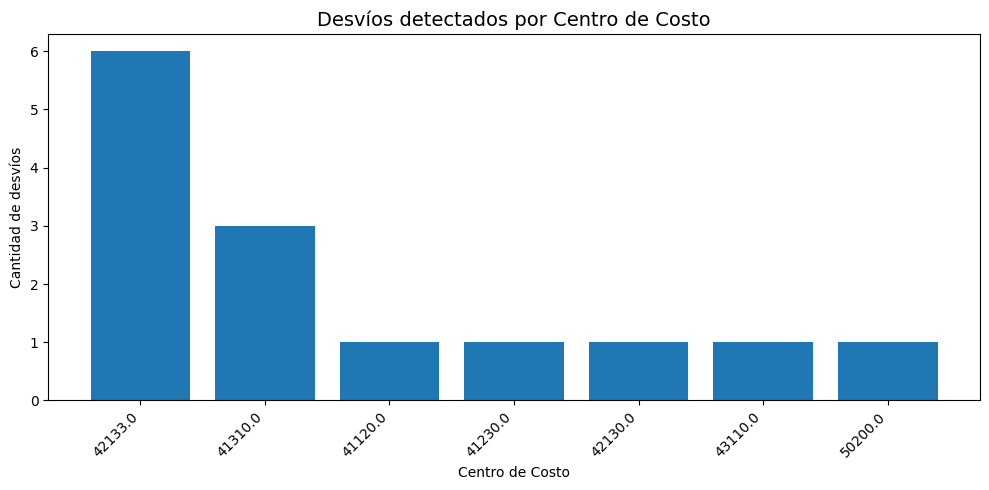

✅ Total de desvíos detectados: 14


In [77]:
# grafico de los desvios

# Agrupar por Centro de Costo y contar
conteo_desvios = (
    desvios.groupby("CENTROCOSTO")["DESVIO"]
    .count()
    .sort_values(ascending=False)
)

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.bar(conteo_desvios.index.astype(str), conteo_desvios.values)
plt.title("Desvíos detectados por Centro de Costo", fontsize=14)
plt.xlabel("Centro de Costo")
plt.ylabel("Cantidad de desvíos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print(f"✅ Total de desvíos detectados: {len(desvios)}")

/tmp/ipython-input-1871868959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado["Error_abs"] = abs(resultado["CANTIDADPOS"] - resultado["CANTIDAD_PRED"])


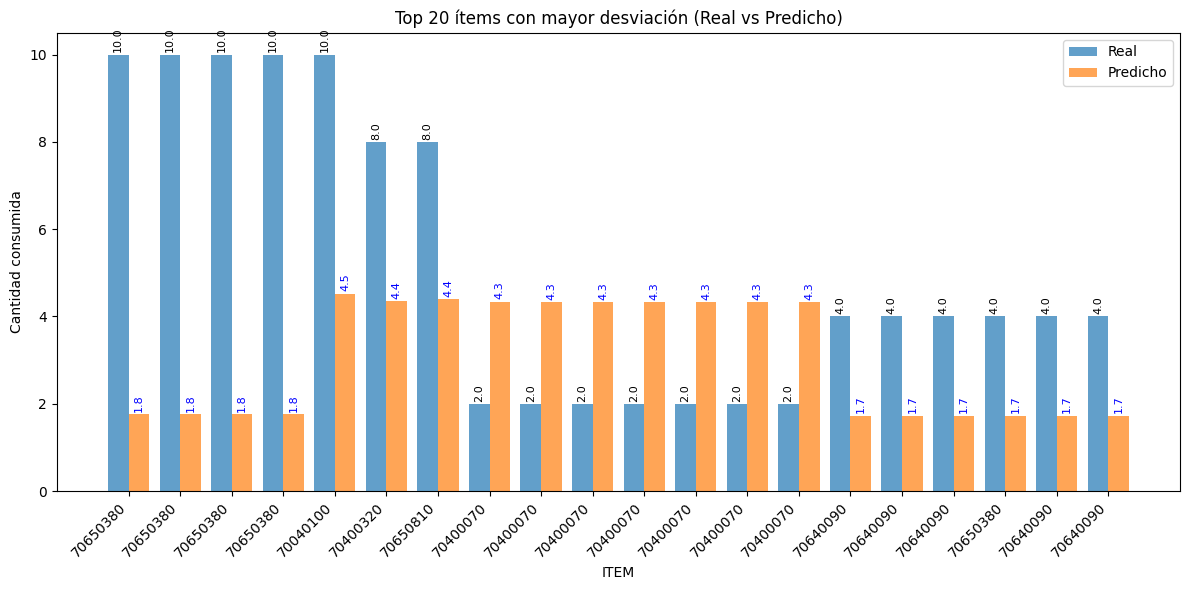

In [78]:
# --- Gráfico: Consumo Real vs. Predicho (Top 20 desviaciones) ---

# Calcular el error absoluto (diferencia entre real y predicho)
resultado["Error_abs"] = abs(resultado["CANTIDADPOS"] - resultado["CANTIDAD_PRED"])

# Seleccionar los 20 casos con mayor desviación
top_desvios = resultado.sort_values(by="Error_abs", ascending=False).head(20)

# Posiciones de las barras en el eje X
x = np.arange(len(top_desvios))
width = 0.4  # ancho de las barras

# Crear gráfico de barras lado a lado
plt.figure(figsize=(12, 6))
bars_real = plt.bar(x - width/2, top_desvios["CANTIDADPOS"], width, label="Real", alpha=0.7)
bars_pred = plt.bar(x + width/2, top_desvios["CANTIDAD_PRED"], width, label="Predicho", alpha=0.7)

# Etiquetas con los valores
for bar in bars_real:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.1f}",
             ha="center", va="bottom", fontsize=8, rotation=90, color="black")

for bar in bars_pred:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.1f}",
             ha="center", va="bottom", fontsize=8, rotation=90, color="blue")

# Configuración de ejes y leyenda
plt.xticks(x, top_desvios["ITEM"].astype(str), rotation=45, ha="right")
plt.title("Top 20 ítems con mayor desviación (Real vs Predicho)")
plt.xlabel("ITEM")
plt.ylabel("Cantidad consumida")
plt.legend()
plt.tight_layout()
plt.show()

# RESULTADO FINAL

Conclusión final del modelo predictivo

El modelo desarrollado, basado en regresión Ridge, tuvo como objetivo predecir el consumo esperado de elementos de protección personal (EPP) —variable CANTIDADPOS— a partir del historial de consumos de los últimos 13 meses.

Durante la etapa de ajuste, el modelo alcanzó los siguientes resultados:

RMSE: 1.07 → el error promedio en las predicciones es de aproximadamente 1 unidad por retiro.

R²: 0.28 → el modelo explica cerca del 28 % de la variabilidad total de los consumos, lo que indica una capacidad predictiva moderada, adecuada para un contexto operativo con alta variabilidad por tareas, personas y centros de costo.

Alpha óptimo: 100 → el grado de regularización aplicado logró un equilibrio entre precisión y generalización, evitando sobreajuste.

El umbral de desvío (2.31) permitió identificar aquellos casos donde el consumo se aparta significativamente del comportamiento histórico esperado.

El gráfico “Top 20 ítems con mayor desviación (Real vs Predicho)” muestra claramente los ítems donde el modelo detectó mayores diferencias entre el consumo real y el estimado.

Se observa que:

En varios casos, los valores reales son considerablemente mayores que los predichos, reflejando posibles aumentos no habituales en la demanda.

Estos picos de desviación pueden asociarse a eventos operativos puntuales, errores de imputación, o cambios en los patrones de uso (por ejemplo, entregas masivas o renovaciones excepcionales de EPP).

El modelo logra representar adecuadamente la tendencia general, pero las variaciones individuales (por legajo o ítem) siguen dependiendo de factores externos que no están en las variables actuales.

Con este modelo podemos:

Evaluar el desvío promedio histórico.

Cargar cualquier archivo mensual y ver qué consumos salen del patrón esperado.

Visualizar gráficamente la distribución de errores y el umbral de alerta.